<a href="https://colab.research.google.com/github/gitnao95/Projet-Data-analyst-of-USDA/blob/main/Projet1/Projet_Analyse_USDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET D'ANALYSE DE LA BASE DE DONNEES NATIONALE DES NUTRIMENTS DU DEPARTEMENT DE L'AGRICULTURE DES ETATS UNIS (USDA) EDITION 28 (2015)
## DESCRIPTION DE LA BASE DE DONNEES : 8790 lignes representant des aliments identifiés par un nom et un code unique et 53 colonnes correspondant aux éléments nutritionnels contenus dans ces aliments pour une portion de 100g.
##SOURCE DE LA BASE DE DONNEES : https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/methods-and-application-of-food-composition-laboratory/mafcl-site-pages/sr11-sr28/
### OBJECTIF : nettoyage de la BDD, études statistiques univariée, bivariée et multivariée sur la BDD

In [2]:
#Importation des packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#chargement de la base de donnée
data = pd.read_excel('USDA_National_Nutrient_DataBase.xlsx')

#affichage des premières lignes
data.head()

NDB_No               Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0    1001        BUTTER,WITH SALT      15.87         717         0.85   
1    1002  BUTTER,WHIPPED,W/ SALT      16.72         718         0.49   
2    1003    BUTTER OIL,ANHYDROUS       0.24         876         0.28   
3    1004             CHEESE,BLUE      42.41         353        21.40   
4    1005            CHEESE,BRICK      41.11         371        23.24   

   Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  ...  \
0          81.11     2.11            0.06           0.0           0.06  ...   
1          78.30     1.62            2.87           0.0           0.06  ...   
2          99.48     0.00            0.00           0.0           0.00  ...   
3          28.74     5.11            2.34           0.0           0.50  ...   
4          29.68     3.18            2.79           0.0           0.51  ...   

   Vit_K_(µg)  FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  Cholestrl_(mg)  GmWt_1  \
0         7.0      51.368       21.021        3.043           215.0    5.00   
1         4.6      45.390       19.874        3.331           225.0    3.80   
2         8.6      61.924       28.732        3.694           256.0   12.80   
3         2.4      18.669        7.778        0.800            75.0   28.35   
4         2.5      18.764        8.598        0.784            94.0  132.00   

                   GmWt_Desc1  GmWt_2       GmWt_Desc2  Refuse_Pct  
0  1 pat,  (1" sq, 1/3" high)    14.2           1 tbsp         0.0  
1  1 pat,  (1" sq, 1/3" high)     9.4           1 tbsp         0.0  
2                      1 tbsp   205.0            1 cup         0.0  
3                        1 oz    17.0     1 cubic inch         0.0  
4                1 cup, diced   113.0  1 cup, shredded         0.0  

[5 rows x 53 columns]

In [4]:
# Changement d'index
data = data.set_index('NDB_No')
#affichage des premières lignes
data.head()

Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
NDB_No                                                               
1001          BUTTER,WITH SALT      15.87         717         0.85   
1002    BUTTER,WHIPPED,W/ SALT      16.72         718         0.49   
1003      BUTTER OIL,ANHYDROUS       0.24         876         0.28   
1004               CHEESE,BLUE      42.41         353        21.40   
1005              CHEESE,BRICK      41.11         371        23.24   

        Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  \
NDB_No                                                                        
1001            81.11     2.11            0.06           0.0           0.06   
1002            78.30     1.62            2.87           0.0           0.06   
1003            99.48     0.00            0.00           0.0           0.00   
1004            28.74     5.11            2.34           0.0           0.50   
1005            29.68     3.18            2.79           0.0           0.51   

        Calcium_(mg)  ...  Vit_K_(µg)  FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  \
NDB_No                ...                                                     
1001            24.0  ...         7.0      51.368       21.021        3.043   
1002            23.0  ...         4.6      45.390       19.874        3.331   
1003             4.0  ...         8.6      61.924       28.732        3.694   
1004           528.0  ...         2.4      18.669        7.778        0.800   
1005           674.0  ...         2.5      18.764        8.598        0.784   

        Cholestrl_(mg)  GmWt_1                  GmWt_Desc1  GmWt_2  \
NDB_No                                                               
1001             215.0    5.00  1 pat,  (1" sq, 1/3" high)    14.2   
1002             225.0    3.80  1 pat,  (1" sq, 1/3" high)     9.4   
1003             256.0   12.80                      1 tbsp   205.0   
1004              75.0   28.35                        1 oz    17.0   
1005              94.0  132.00                1 cup, diced   113.0   

             GmWt_Desc2  Refuse_Pct  
NDB_No                               
1001             1 tbsp         0.0  
1002             1 tbsp         0.0  
1003              1 cup         0.0  
1004       1 cubic inch         0.0  
1005    1 cup, shredded         0.0  

[5 rows x 52 columns]

## ANALYSE PRELIMINAIRE

In [5]:
#Analyse de la dimension de la BDD
data.shape

(8790, 52)

In [6]:
#Analyse de l'ensemble des variables de la BDD
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 1001 to 93600
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Shrt_Desc          8790 non-null   object 
 1   Water_(g)          8789 non-null   float64
 2   Energ_Kcal         8790 non-null   int64  
 3   Protein_(g)        8790 non-null   float64
 4   Lipid_Tot_(g)      8790 non-null   float64
 5   Ash_(g)            8465 non-null   float64
 6   Carbohydrt_(g)     8790 non-null   float64
 7   Fiber_TD_(g)       8196 non-null   float64
 8   Sugar_Tot_(g)      6958 non-null   float64
 9   Calcium_(mg)       8442 non-null   float64
 10  Iron_(mg)          8646 non-null   float64
 11  Magnesium_(mg)     8051 non-null   float64
 12  Phosphorus_(mg)    8211 non-null   float64
 13  Potassium_(mg)     8364 non-null   float64
 14  Sodium_(mg)        8707 non-null   float64
 15  Zinc_(mg)          8084 non-null   float64
 16  Copper_mg)         7533 n

In [7]:
#Analyse du type de variable
data.dtypes

Shrt_Desc             object
Water_(g)            float64
Energ_Kcal             int64
Protein_(g)          float64
Lipid_Tot_(g)        float64
Ash_(g)              float64
Carbohydrt_(g)       float64
Fiber_TD_(g)         float64
Sugar_Tot_(g)        float64
Calcium_(mg)         float64
Iron_(mg)            float64
Magnesium_(mg)       float64
Phosphorus_(mg)      float64
Potassium_(mg)       float64
Sodium_(mg)          float64
Zinc_(mg)            float64
Copper_mg)           float64
Manganese_(mg)       float64
Selenium_(µg)        float64
Vit_C_(mg)           float64
Thiamin_(mg)         float64
Riboflavin_(mg)      float64
Niacin_(mg)          float64
Panto_Acid_mg)       float64
Vit_B6_(mg)          float64
Folate_Tot_(µg)      float64
Folic_Acid_(µg)      float64
Food_Folate_(µg)     float64
Folate_DFE_(µg)      float64
Choline_Tot_ (mg)    float64
Vit_B12_(µg)         float64
Vit_A_IU             float64
Vit_A_RAE            float64
Retinol_(µg)         float64
Alpha_Carot_(µg)     float64
Beta_Carot_(µg)      float64
Beta_Crypt_(µg)      float64
Lycopene_(µg)        float64
Lut+Zea_ (µg)        float64
Vit_E_(mg)           float64
Vit_D_µg             float64
Vit_D_IU             float64
Vit_K_(µg)           float64
FA_Sat_(g)           float64
FA_Mono_(g)          float64
FA_Poly_(g)          float64
Cholestrl_(mg)       float64
GmWt_1               float64
GmWt_Desc1            object
GmWt_2               float64
GmWt_Desc2            object
Refuse_Pct           float64
dtype: object

###RECHERCHE DE DOUBLONS

In [8]:
#Recherche de doublons dans les colonnes
#data.duplicated().sum()
duplicates = data[data.duplicated()]

#Afficher les doublons
print("Doublons : ")
print(duplicates)

Doublons : 
Empty DataFrame
Columns: [Shrt_Desc, Water_(g), Energ_Kcal, Protein_(g), Lipid_Tot_(g), Ash_(g), Carbohydrt_(g), Fiber_TD_(g), Sugar_Tot_(g), Calcium_(mg), Iron_(mg), Magnesium_(mg), Phosphorus_(mg), Potassium_(mg), Sodium_(mg), Zinc_(mg), Copper_mg), Manganese_(mg), Selenium_(µg), Vit_C_(mg), Thiamin_(mg), Riboflavin_(mg), Niacin_(mg), Panto_Acid_mg), Vit_B6_(mg), Folate_Tot_(µg), Folic_Acid_(µg), Food_Folate_(µg), Folate_DFE_(µg), Choline_Tot_ (mg), Vit_B12_(µg), Vit_A_IU, Vit_A_RAE, Retinol_(µg), Alpha_Carot_(µg), Beta_Carot_(µg), Beta_Crypt_(µg), Lycopene_(µg), Lut+Zea_ (µg), Vit_E_(mg), Vit_D_µg, Vit_D_IU, Vit_K_(µg), FA_Sat_(g), FA_Mono_(g), FA_Poly_(g), Cholestrl_(mg), GmWt_1, GmWt_Desc1, GmWt_2, GmWt_Desc2, Refuse_Pct]
Index: []

[0 rows x 52 columns]


### RECHERCHE DE DONNEES MANQUANTES

<Axes: >

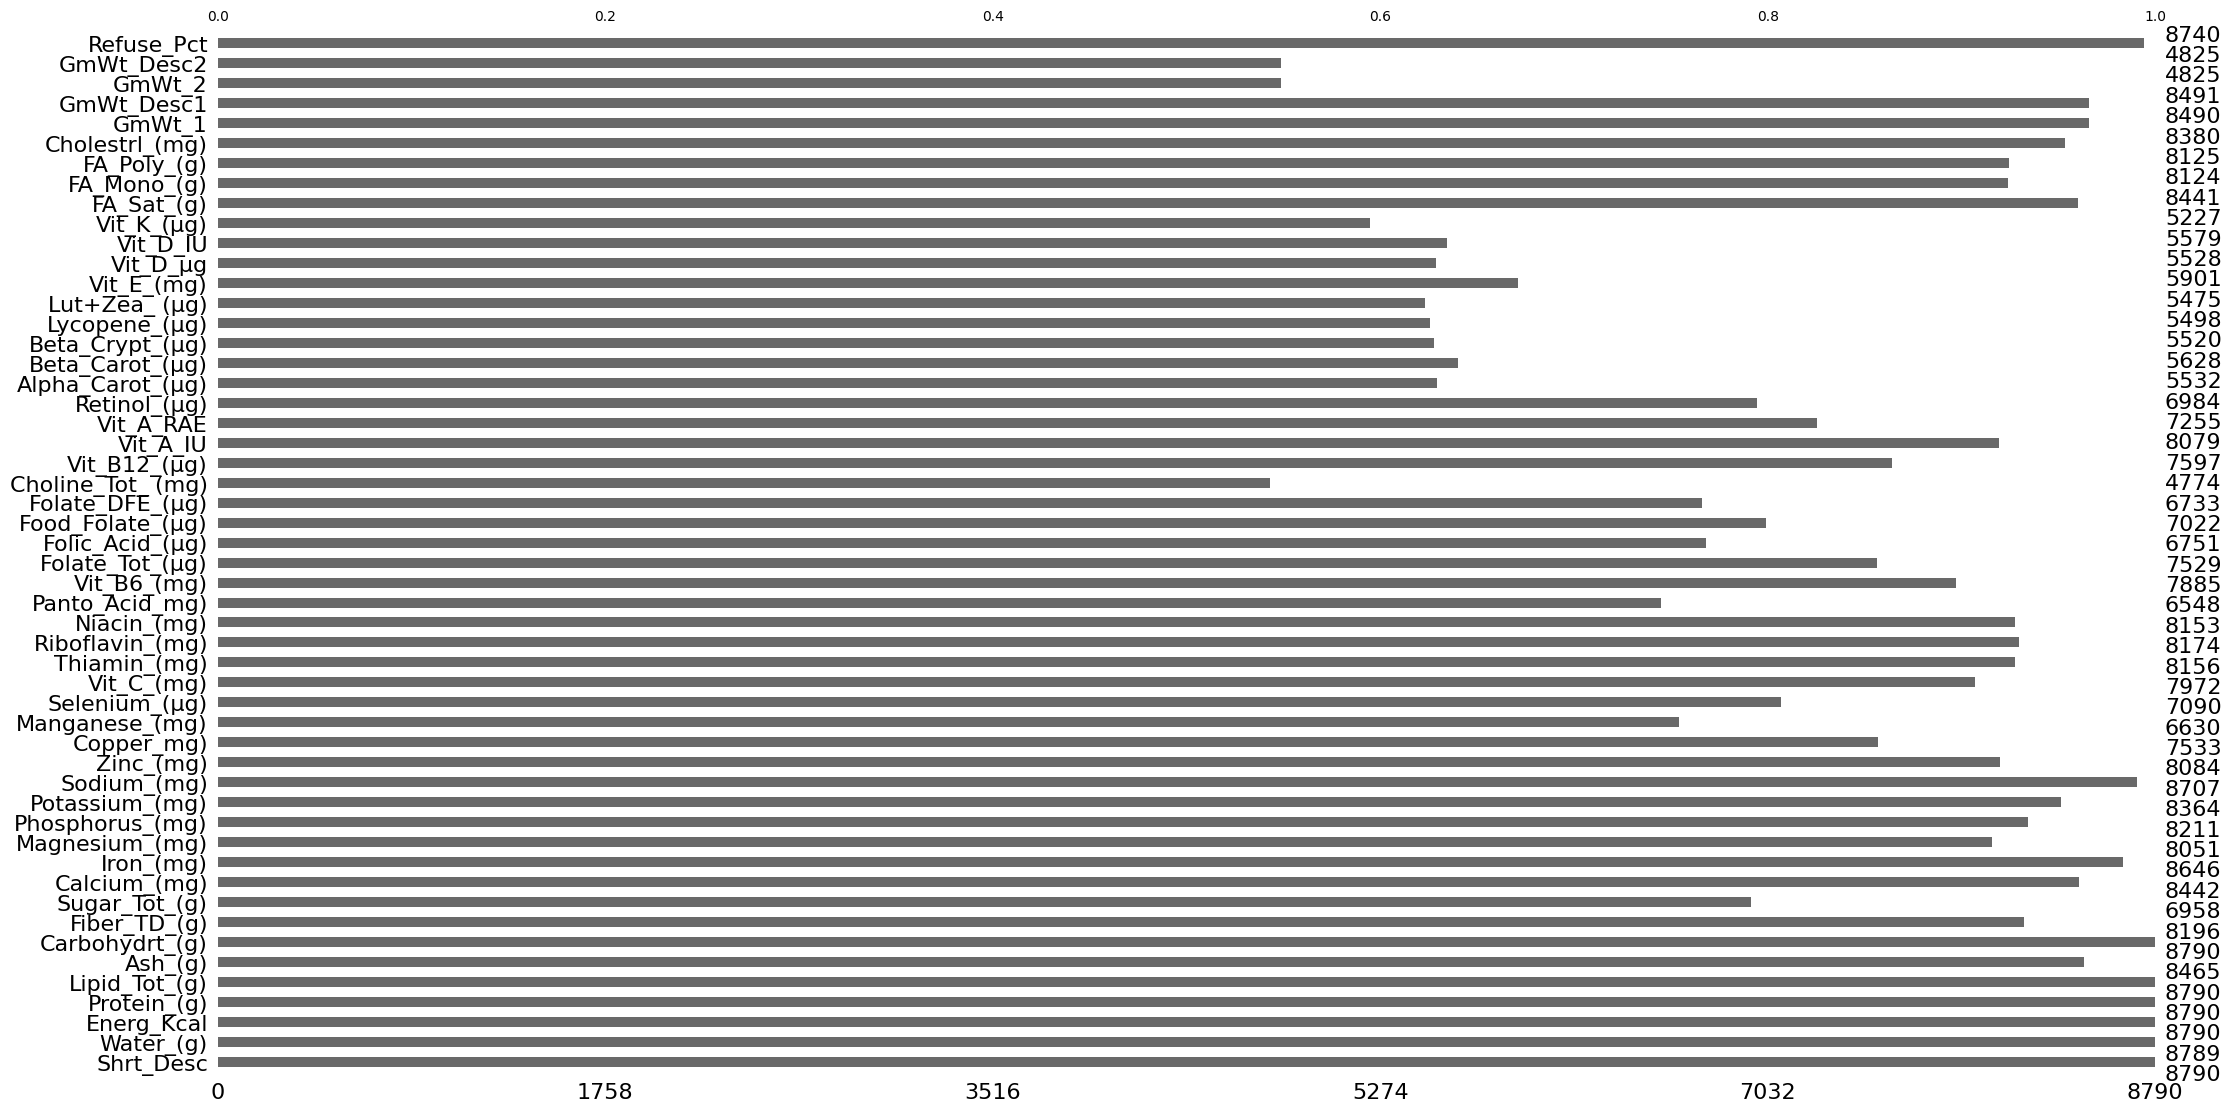

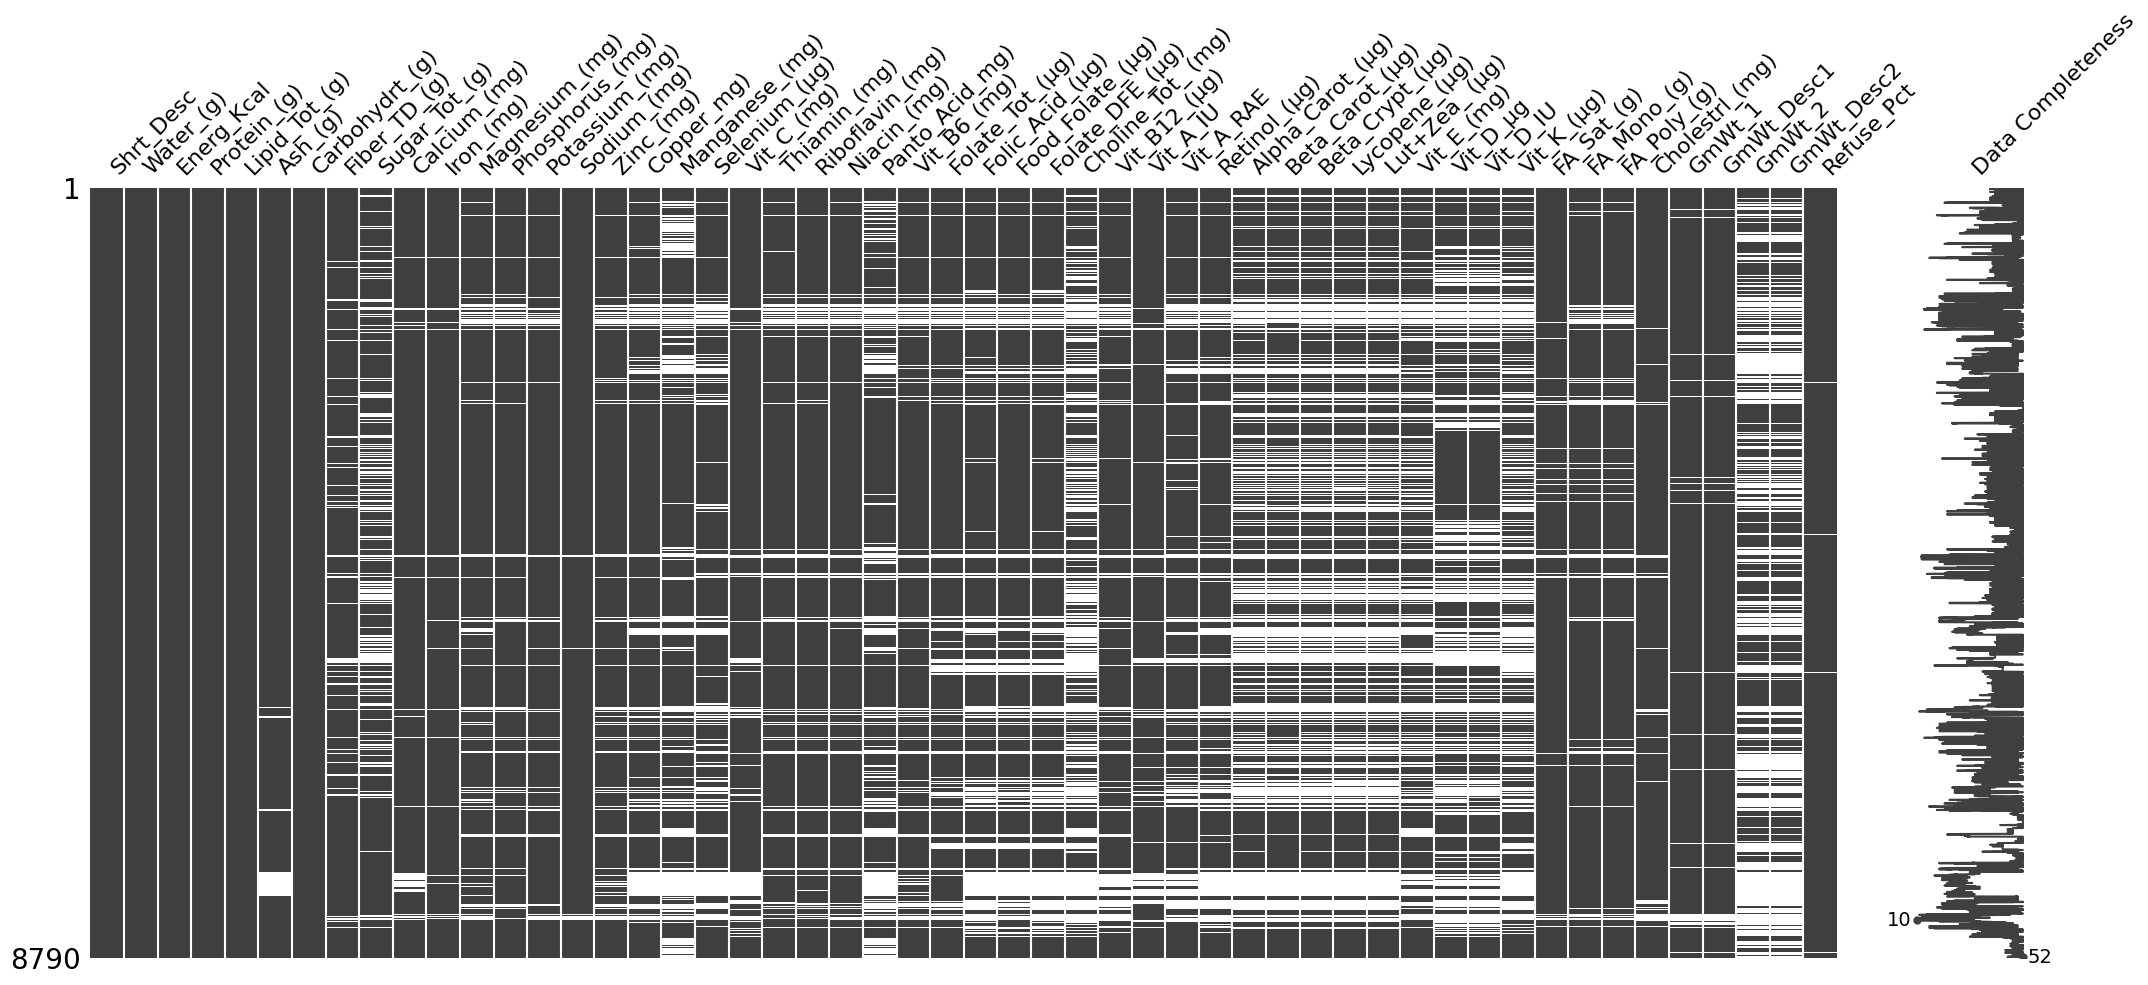

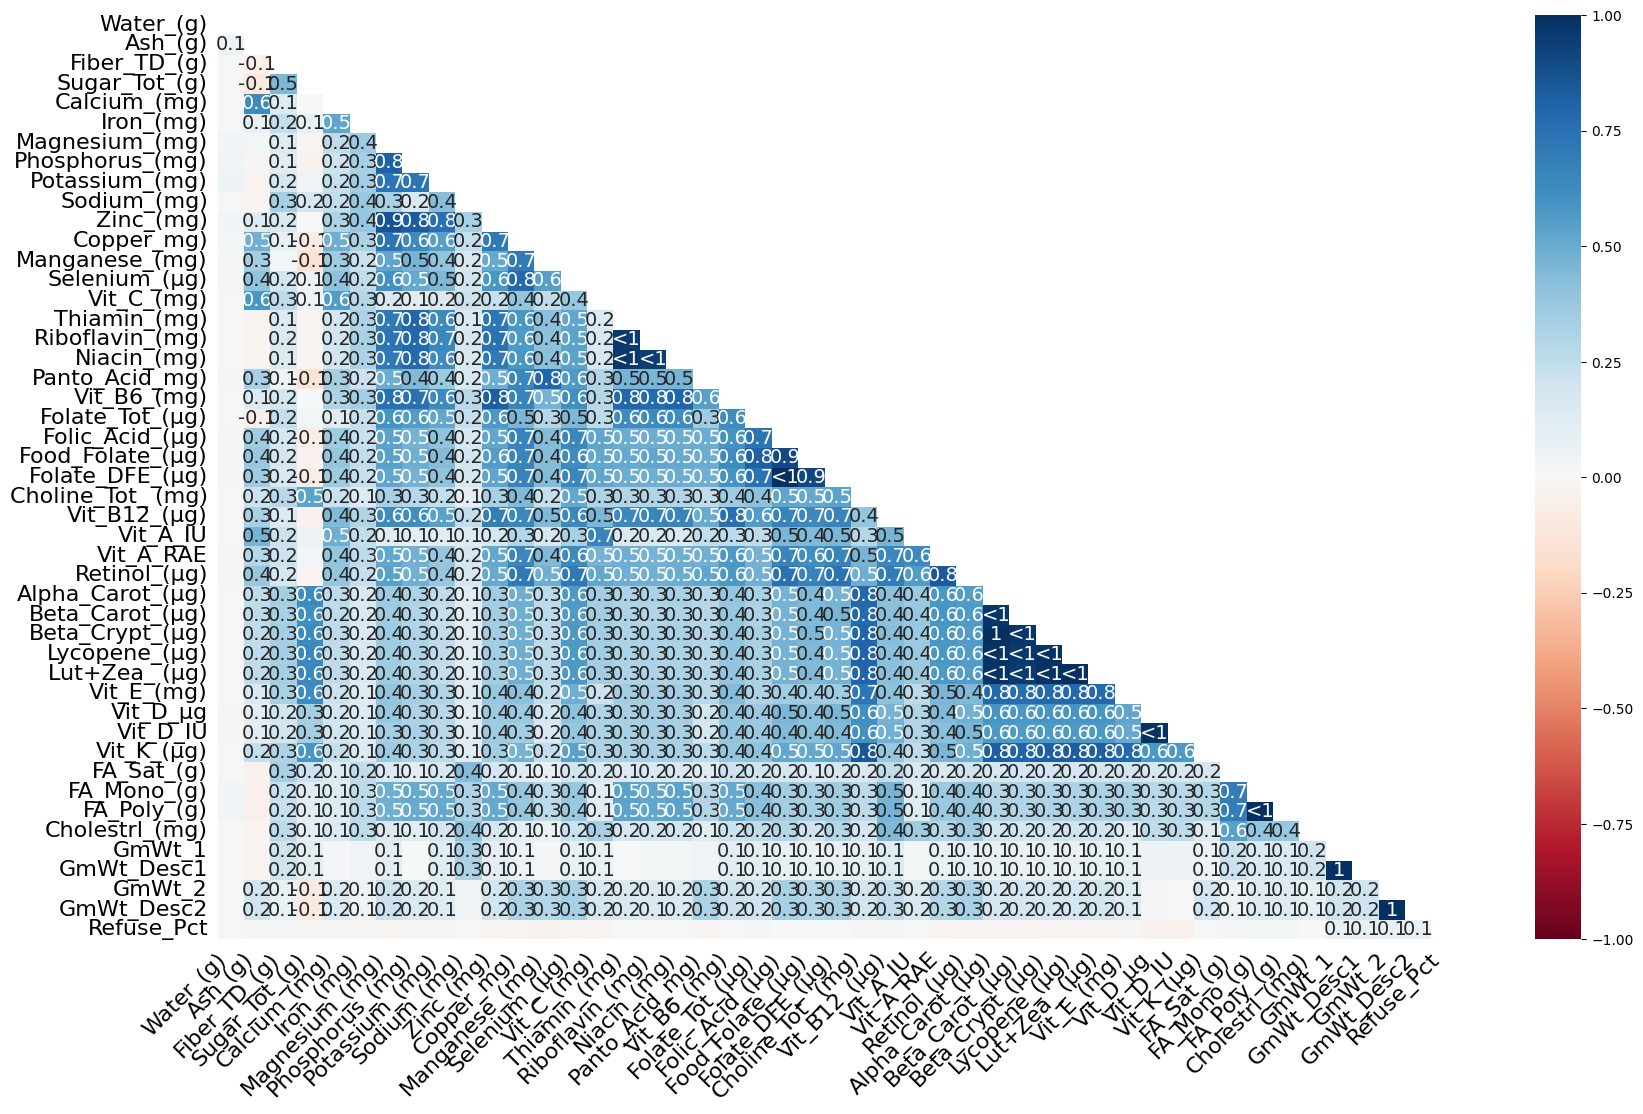

In [9]:

#Affichage des valeurs manquantes avec le package missingno
import missingno as msno
#Sous forme de diagramme en bar
msno.bar(data)
#Sous forme de matrice
msno.matrix(data, labels = True)
#Sous forme de heatmap
msno.heatmap(data)

In [10]:
#Calcul du nombre de données manquantes par variable
missing_value = data.isnull().sum()
#missing_value

#Calcul de la proportion de valeurs manquantes par variable
missing_proportion = missing_value/len(data)
#missing_proportion

#Creation de dataframe avec les donnees manquantes et leur proportion
missing_df = pd.concat([missing_value, missing_proportion], axis = 1)
missing_df.columns = ['missing_value', 'missing_proportion']

#Tri du nombre de valeurs manquantes par ordre decroissant
missing_df = missing_df.sort_values(by = 'missing_value', ascending = False)

#Affichage du tableau des valeurs manquantes
missing_df

missing_value  missing_proportion
Choline_Tot_ (mg)           4016            0.456883
GmWt_Desc2                  3965            0.451081
GmWt_2                      3965            0.451081
Vit_K_(µg)                  3563            0.405347
Lut+Zea_ (µg)               3315            0.377133
Lycopene_(µg)               3292            0.374516
Beta_Crypt_(µg)             3270            0.372014
Vit_D_µg                    3262            0.371104
Alpha_Carot_(µg)            3258            0.370648
Vit_D_IU                    3211            0.365301
Beta_Carot_(µg)             3162            0.359727
Vit_E_(mg)                  2889            0.328669
Panto_Acid_mg)              2242            0.255063
Manganese_(mg)              2160            0.245734
Folate_DFE_(µg)             2057            0.234016
Folic_Acid_(µg)             2039            0.231968
Sugar_Tot_(g)               1832            0.208419
Retinol_(µg)                1806            0.205461
Food_Folate_(µg)            1768            0.201138
Selenium_(µg)               1700            0.193402
Vit_A_RAE                   1535            0.174630
Folate_Tot_(µg)             1261            0.143458
Copper_mg)                  1257            0.143003
Vit_B12_(µg)                1193            0.135722
Vit_B6_(mg)                  905            0.102958
Vit_C_(mg)                   818            0.093060
Magnesium_(mg)               739            0.084073
Vit_A_IU                     711            0.080887
Zinc_(mg)                    706            0.080319
FA_Mono_(g)                  666            0.075768
FA_Poly_(g)                  665            0.075654
Niacin_(mg)                  637            0.072469
Thiamin_(mg)                 634            0.072127
Riboflavin_(mg)              616            0.070080
Fiber_TD_(g)                 594            0.067577
Phosphorus_(mg)              579            0.065870
Potassium_(mg)               426            0.048464
Cholestrl_(mg)               410            0.046644
FA_Sat_(g)                   349            0.039704
Calcium_(mg)                 348            0.039590
Ash_(g)                      325            0.036974
GmWt_1                       300            0.034130
GmWt_Desc1                   299            0.034016
Iron_(mg)                    144            0.016382
Sodium_(mg)                   83            0.009443
Refuse_Pct                    50            0.005688
Water_(g)                      1            0.000114
Carbohydrt_(g)                 0            0.000000
Lipid_Tot_(g)                  0            0.000000
Protein_(g)                    0            0.000000
Energ_Kcal                     0            0.000000
Shrt_Desc                      0            0.000000

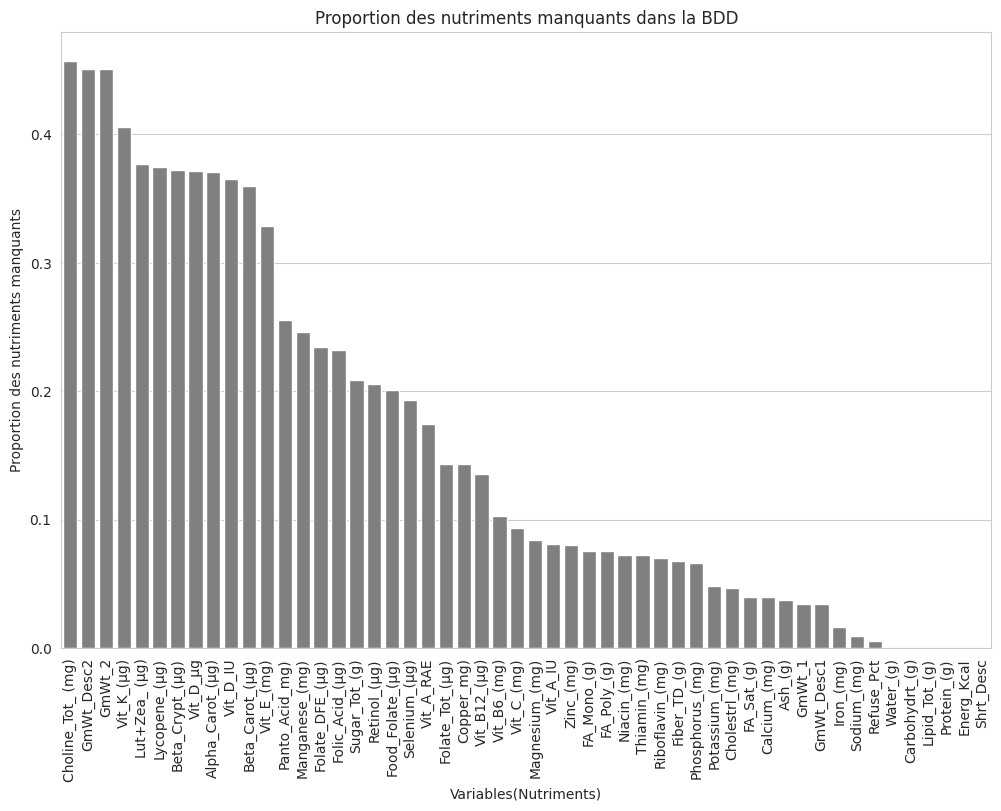

In [11]:
#Creation du graphique pour visualiser les proportions de valeurs manquantes
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = missing_df.index, y = missing_df['missing_proportion'], ax=ax, color ='gray')
ax.set_xlabel('Variables(Nutriments)')
ax.set_ylabel('Proportion des nutriments manquants')
ax.set_title('Proportion des nutriments manquants dans la BDD')
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.xticks(rotation = 90)
plt.show()

### INTERPRETATION DES RESULTATS

4 variables de la BDD ont une proportion de plus de 40% de valeurs manquantes: il s'agit de la choline (46%), de la vitamine K (41%), de la deuxième portion typique de l'aliment (45%) et du descriptif de la deuxieme portion typique de cet aliment (45%) .
- Pour les deux premières (choline et vitamine K), il semblerait que plusieurs aliments ne contiennent pas ces nutriments.
Par exemple : plusieurs types de yogurts et de babyfood ne contiendrait pas de vitamines K et de cholines.
On peut se rapprocher des équipes métiers et des experts pour savoir si ce constat est vérifié.
- Pour les deux dernières, il semblerait que la deuxième portion typique de l'aliment ne peut etre ou n'a pas été quantifiée.
On peut se rapprocher de l'équipe en charge de fournir la base de données pour avoir des informations.


### CHOIX ARBITRAIRE DE QUELQUES VARIABLES POUR CONTINUER L'ANALYSE
Supposons qu'après avoir discuté avec les métiers, nous decidons de garder les 15 premiers nutriments ayant les meilleures proportions dans chaque aliment.

In [12]:
# prompt: crée une liste nommée vars_list rempli des 15 dernieres variables ayant les  meilleurs proportions à partir de missing_df et affiche vars_list
vars_list = missing_df.sort_values(by='missing_proportion', ascending=True).head(15).index.tolist()
vars_list

['Shrt_Desc',
 'Carbohydrt_(g)',
 'Energ_Kcal',
 'Protein_(g)',
 'Lipid_Tot_(g)',
 'Water_(g)',
 'Refuse_Pct',
 'Sodium_(mg)',
 'Iron_(mg)',
 'GmWt_Desc1',
 'GmWt_1',
 'Ash_(g)',
 'Calcium_(mg)',
 'FA_Sat_(g)',
 'Cholestrl_(mg)']

In [13]:
#Remplacement de certaines variables
index_elemnt_a_rempl = [0, 6, 9,10]  #les index des elements a remplacer
Liste_de_remplcmt = ["Fiber_TD_(g)", "Potassium_(mg)", "Phosphorus_(mg)", "Magnesium_(mg)" ]
for i, j in zip(index_elemnt_a_rempl, Liste_de_remplcmt):

    vars_list[i] = j
vars_list

['Fiber_TD_(g)',
 'Carbohydrt_(g)',
 'Energ_Kcal',
 'Protein_(g)',
 'Lipid_Tot_(g)',
 'Water_(g)',
 'Potassium_(mg)',
 'Sodium_(mg)',
 'Iron_(mg)',
 'Phosphorus_(mg)',
 'Magnesium_(mg)',
 'Ash_(g)',
 'Calcium_(mg)',
 'FA_Sat_(g)',
 'Cholestrl_(mg)']

In [14]:
#Calcul du nombre de donnees manquantes dans les variables choisies
missing_val = data[vars_list].isnull().sum()

#Calcul de la proportion de données manquantes dans les variables choisies
missing_prop = data[vars_list].isnull().sum()/len(data)

#Concatenation des deux listes
missing_prop = pd.concat([missing_val, missing_prop], axis = 1)

#Renommage de colonnes
missing_prop.columns = ['missing_val', 'missing_prop']
#missing_prop = missing_prop.rename_axis('variable').reset_index(name='missing_prop') # pour le cas dune serie pandas Rename index and create a DataFrame
missing_prop = missing_prop.rename_axis('variable')

#Tri par ordre decroissant de la proportion de valeurs manquantes
missing_prop = missing_prop.sort_values(by= 'missing_prop', ascending = False)

#Affichage des proportions de données manquantes
missing_prop

missing_val  missing_prop
variable                                  
Magnesium_(mg)           739      0.084073
Fiber_TD_(g)             594      0.067577
Phosphorus_(mg)          579      0.065870
Potassium_(mg)           426      0.048464
Cholestrl_(mg)           410      0.046644
FA_Sat_(g)               349      0.039704
Calcium_(mg)             348      0.039590
Ash_(g)                  325      0.036974
Iron_(mg)                144      0.016382
Sodium_(mg)               83      0.009443
Water_(g)                  1      0.000114
Carbohydrt_(g)             0      0.000000
Energ_Kcal                 0      0.000000
Protein_(g)                0      0.000000
Lipid_Tot_(g)              0      0.000000

In [15]:
#Rajouter la colonne de description à la nouvelle liste
keep_vars = ['Shrt_Desc'] + vars_list
keep_vars

['Shrt_Desc',
 'Fiber_TD_(g)',
 'Carbohydrt_(g)',
 'Energ_Kcal',
 'Protein_(g)',
 'Lipid_Tot_(g)',
 'Water_(g)',
 'Potassium_(mg)',
 'Sodium_(mg)',
 'Iron_(mg)',
 'Phosphorus_(mg)',
 'Magnesium_(mg)',
 'Ash_(g)',
 'Calcium_(mg)',
 'FA_Sat_(g)',
 'Cholestrl_(mg)']

In [16]:
#Selection de la BDD correspondant aux variables selectionnées
data_keep = data[keep_vars]

#Affichage des 10 premieres lignes de la nouvelle BDD
data_keep.head(10)

Shrt_Desc  Fiber_TD_(g)  Carbohydrt_(g)  Energ_Kcal  \
NDB_No                                                                     
1001          BUTTER,WITH SALT           0.0            0.06         717   
1002    BUTTER,WHIPPED,W/ SALT           0.0            2.87         718   
1003      BUTTER OIL,ANHYDROUS           0.0            0.00         876   
1004               CHEESE,BLUE           0.0            2.34         353   
1005              CHEESE,BRICK           0.0            2.79         371   
1006               CHEESE,BRIE           0.0            0.45         334   
1007          CHEESE,CAMEMBERT           0.0            0.46         300   
1008            CHEESE,CARAWAY           0.0            3.06         376   
1009            CHEESE,CHEDDAR           0.0            3.09         404   
1010           CHEESE,CHESHIRE           0.0            4.78         387   

        Protein_(g)  Lipid_Tot_(g)  Water_(g)  Potassium_(mg)  Sodium_(mg)  \
NDB_No                                                                       
1001           0.85          81.11      15.87            24.0        643.0   
1002           0.49          78.30      16.72            41.0        583.0   
1003           0.28          99.48       0.24             5.0          2.0   
1004          21.40          28.74      42.41           256.0       1146.0   
1005          23.24          29.68      41.11           136.0        560.0   
1006          20.75          27.68      48.42           152.0        629.0   
1007          19.80          24.26      51.80           187.0        842.0   
1008          25.18          29.20      39.28            93.0        690.0   
1009          22.87          33.31      37.02            76.0        653.0   
1010          23.37          30.60      37.65            95.0        700.0   

        Iron_(mg)  Phosphorus_(mg)  Magnesium_(mg)  Ash_(g)  Calcium_(mg)  \
NDB_No                                                                      
1001         0.02             24.0             2.0     2.11          24.0   
1002         0.05             24.0             1.0     1.62          23.0   
1003         0.00              3.0             0.0     0.00           4.0   
1004         0.31            387.0            23.0     5.11         528.0   
1005         0.43            451.0            24.0     3.18         674.0   
1006         0.50            188.0            20.0     2.70         184.0   
1007         0.33            347.0            20.0     3.68         388.0   
1008         0.64            490.0            22.0     3.28         673.0   
1009         0.14            455.0            27.0     3.71         710.0   
1010         0.21            464.0            21.0     3.60         643.0   

        FA_Sat_(g)  Cholestrl_(mg)  
NDB_No                              
1001        51.368           215.0  
1002        45.390           225.0  
1003        61.924           256.0  
1004        18.669            75.0  
1005        18.764            94.0  
1006        17.410           100.0  
1007        15.259            72.0  
1008        18.584            93.0  
1009        18.867            99.0  
1010        19.475           103.0

### GESTION DES VALEURS MANQUANTES DANS LA NOUVELLE BDD



<Axes: >

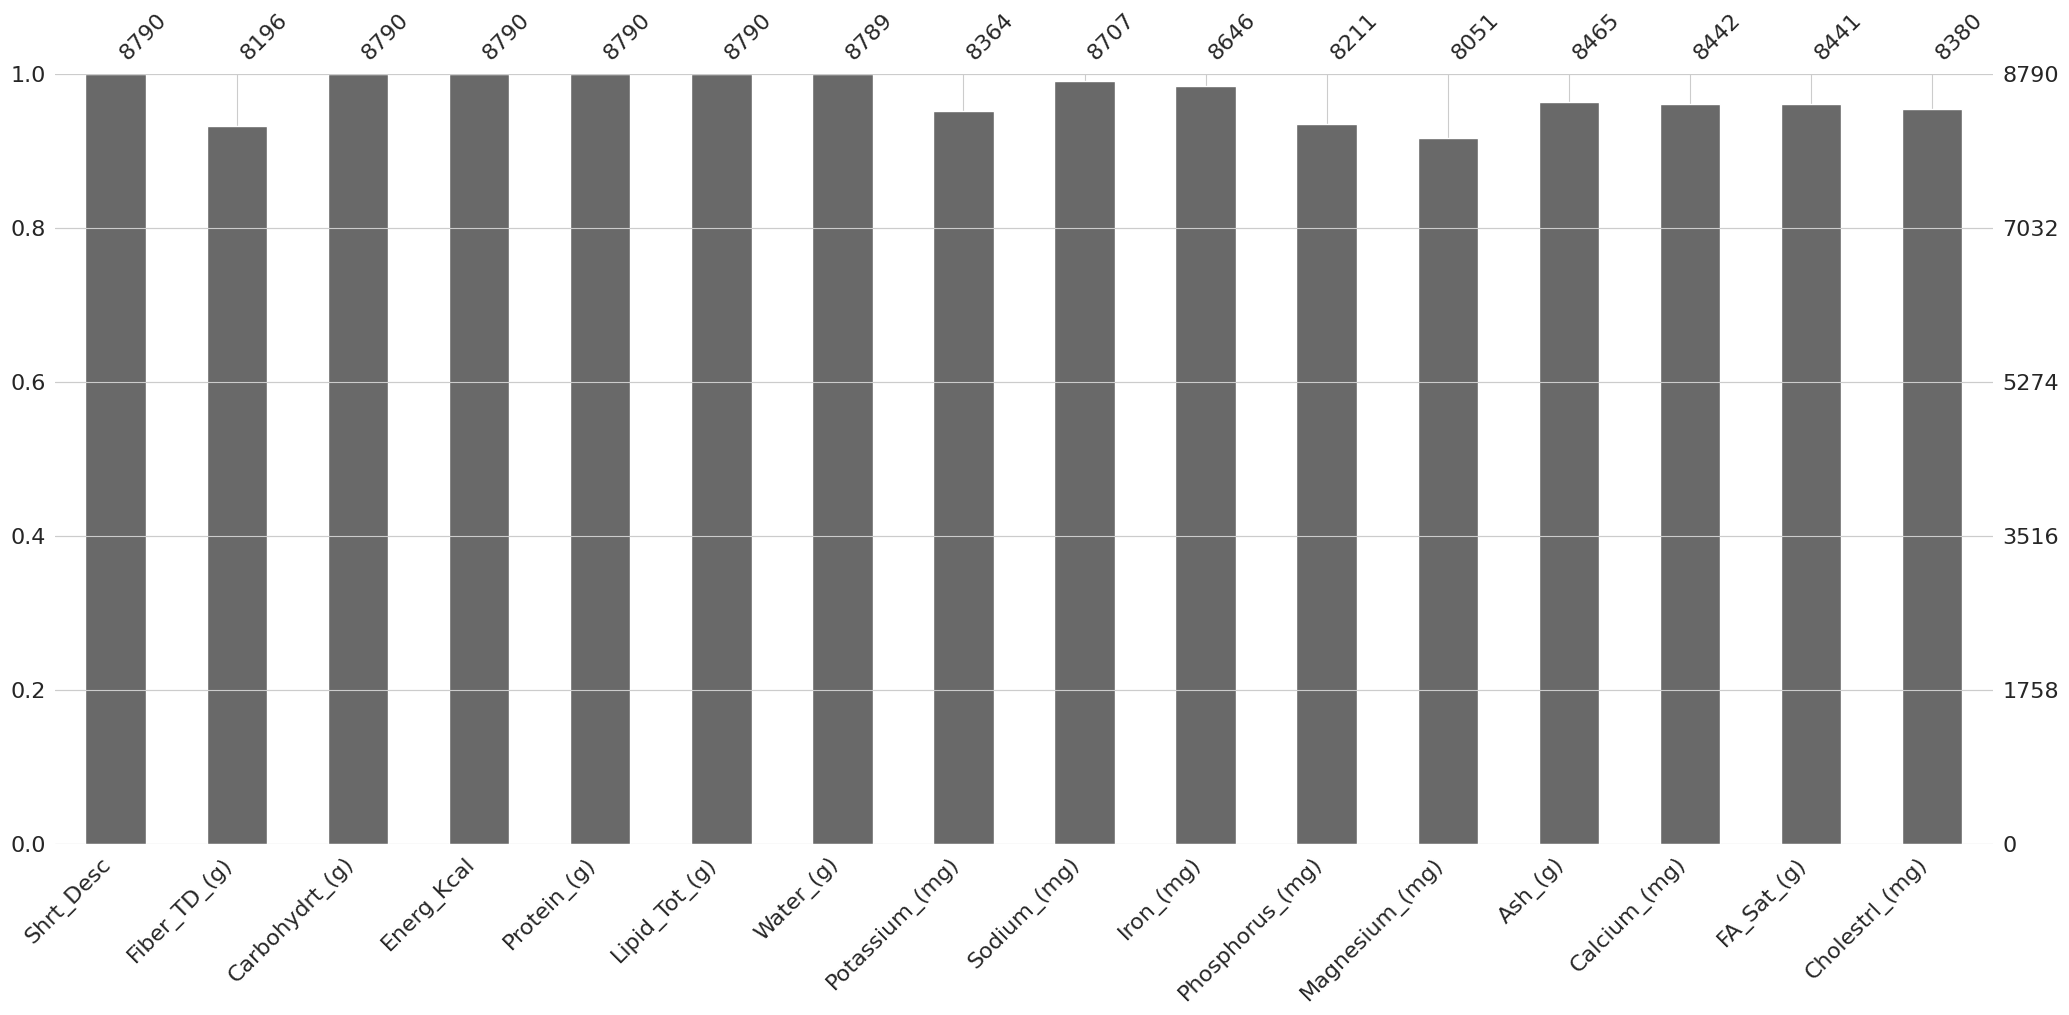

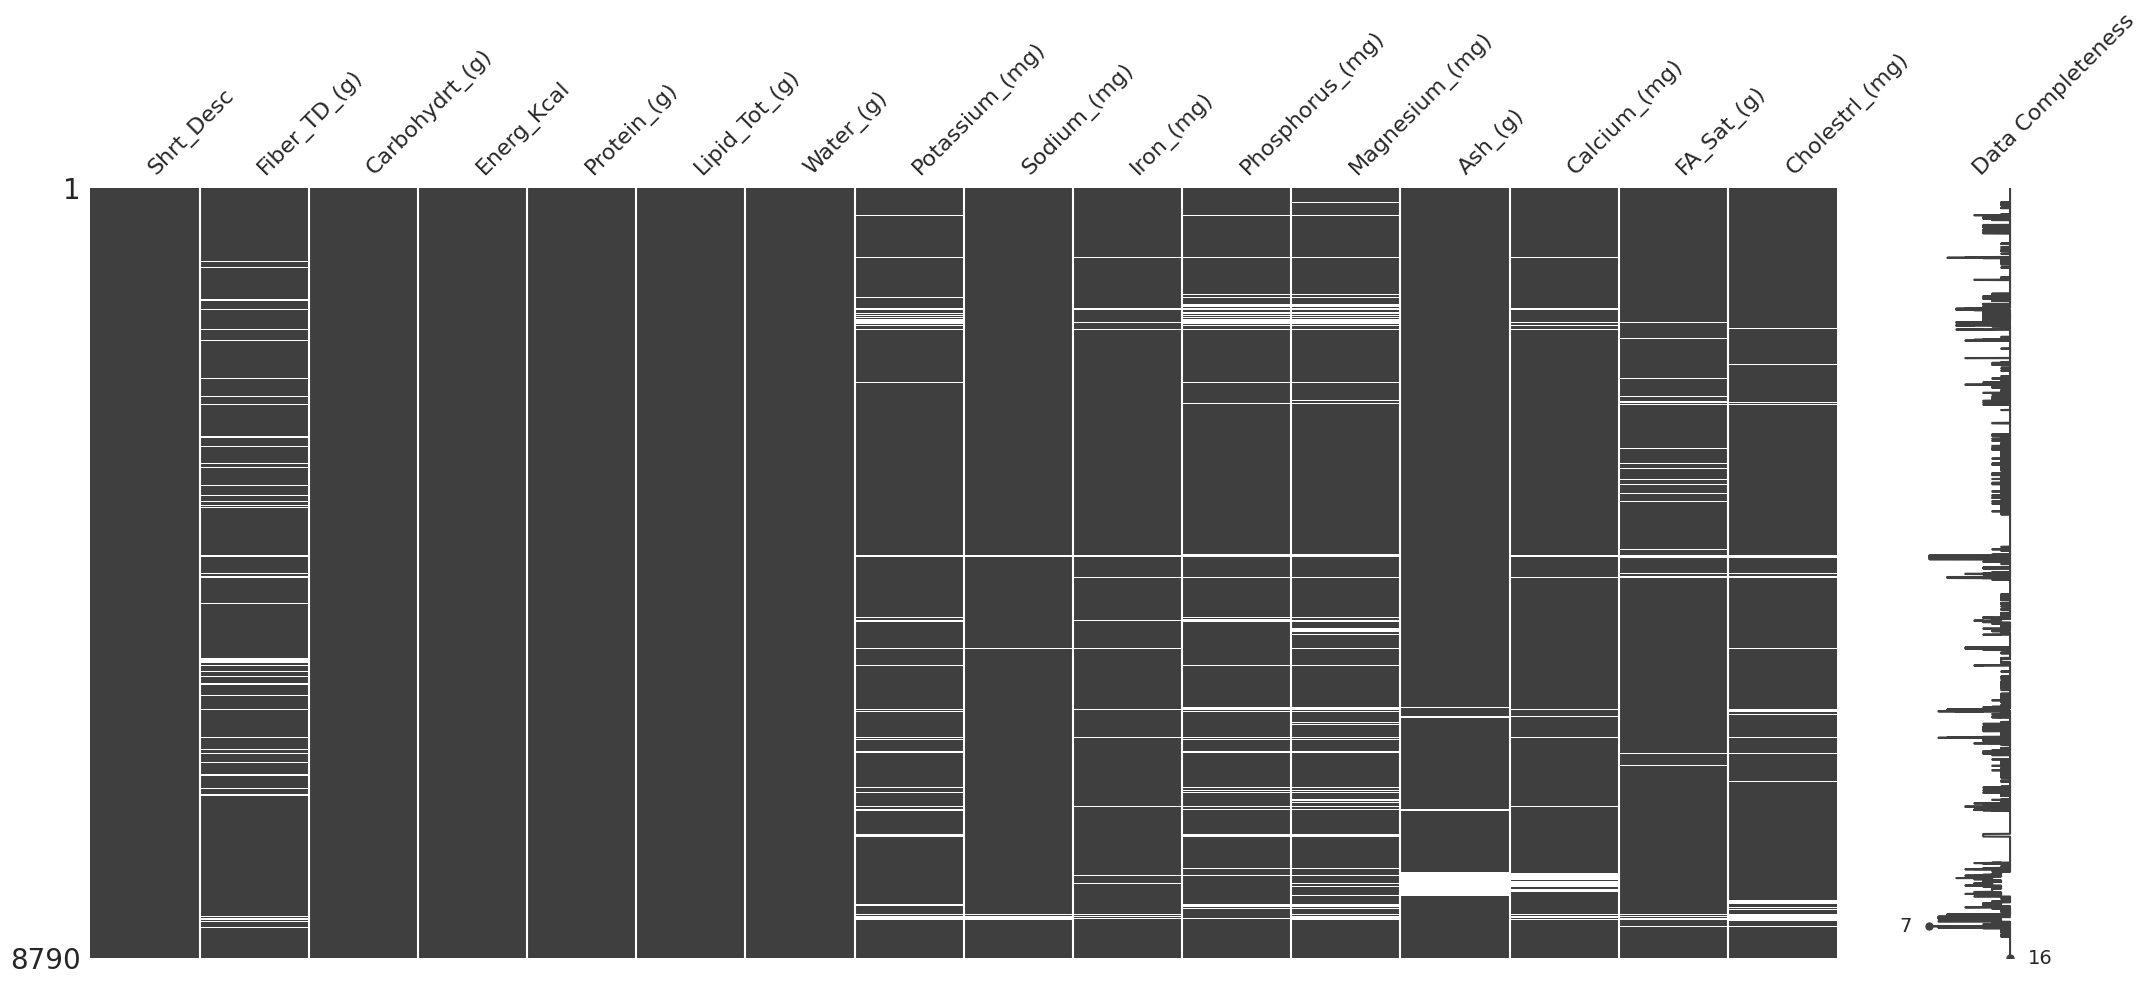

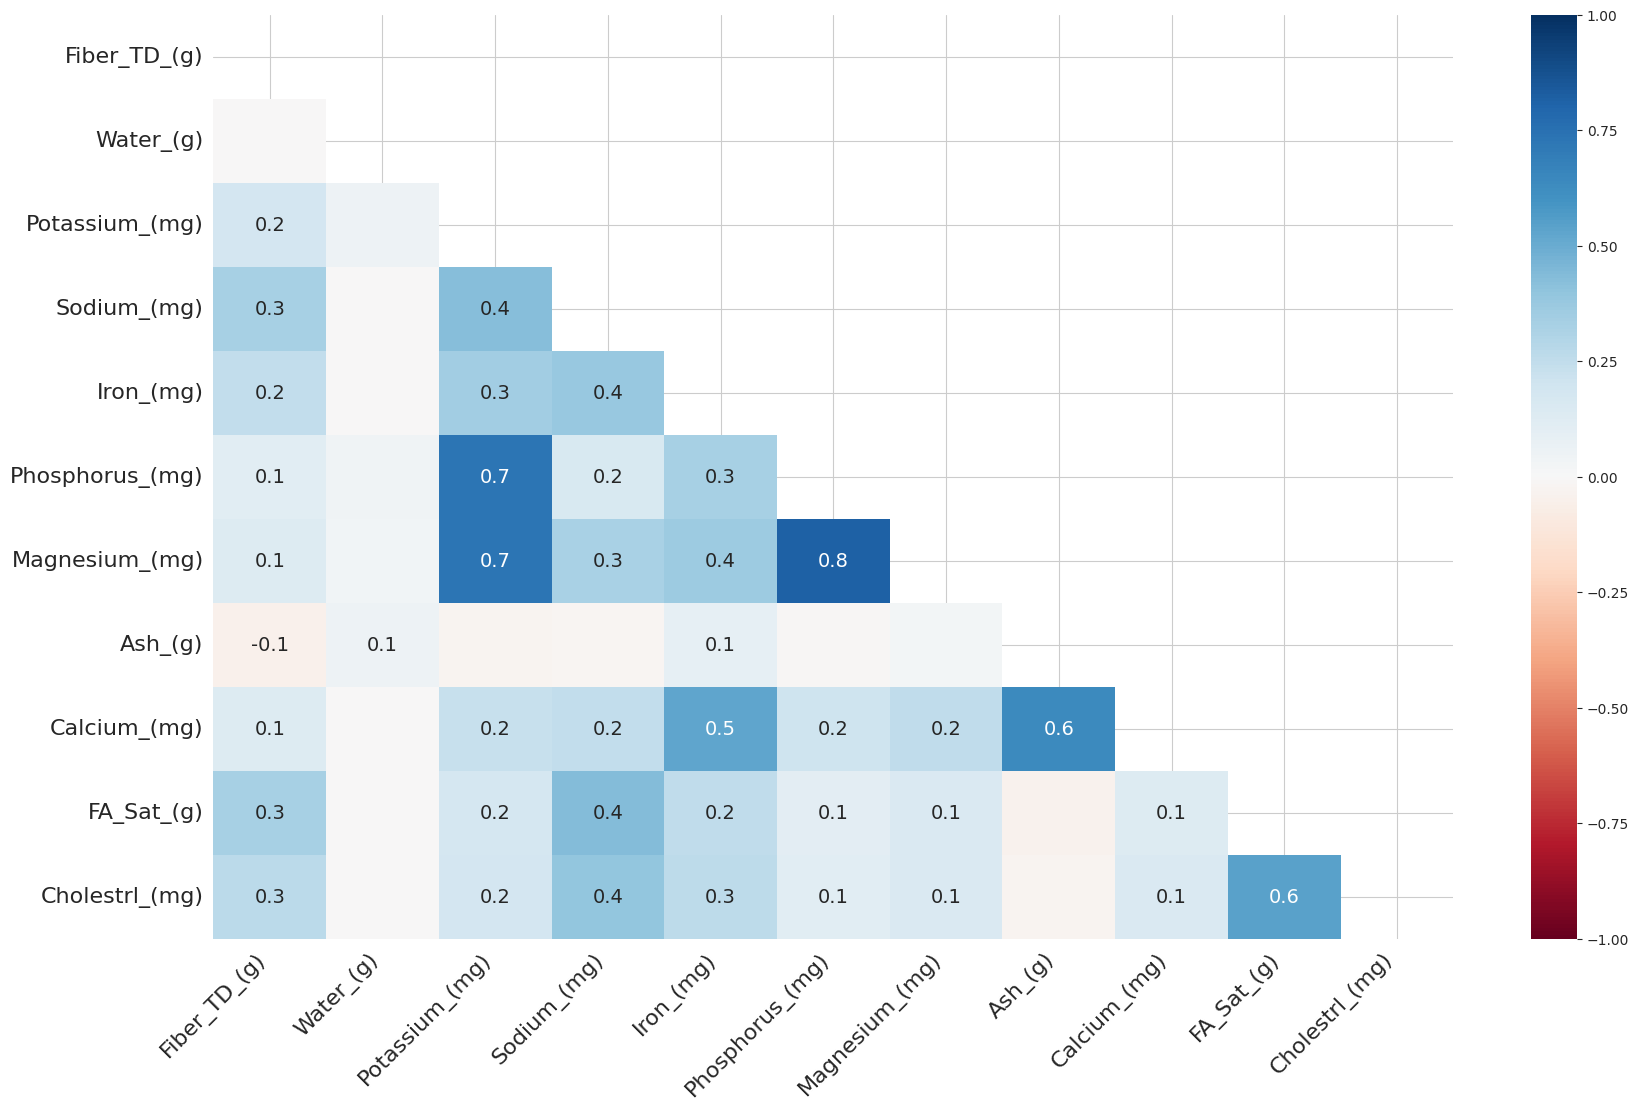

In [17]:
#Affichage des valeurs manquantes dans la nouvelle BDD avec le package missingno
import missingno as msno
#Sous forme de diagramme en bar
msno.bar(data_keep)
#Sous forme de matrice
msno.matrix(data_keep, labels = True)
#Sous forme de heatmap
msno.heatmap(data_keep)

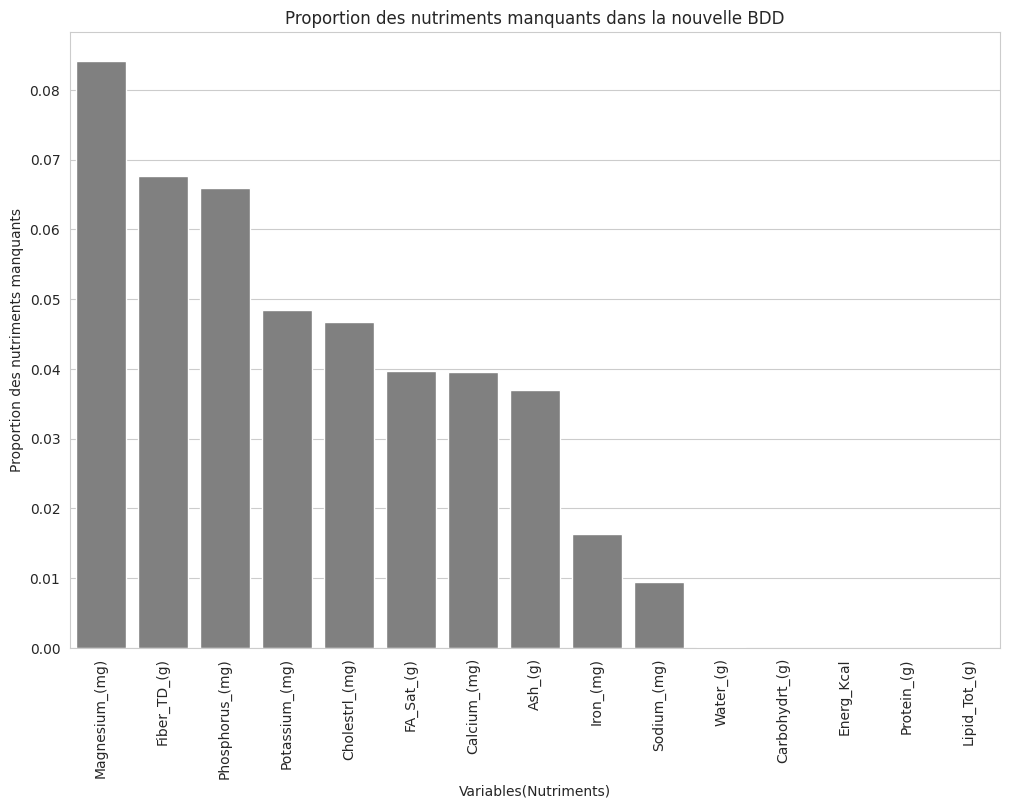

In [18]:
#Creation du graphique pour visualiser les proportions de valeurs manquantes
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = missing_prop.index, y = missing_prop['missing_prop'], ax=ax, color ='gray')
ax.set_xlabel('Variables(Nutriments)')
ax.set_ylabel('Proportion des nutriments manquants')
ax.set_title('Proportion des nutriments manquants dans la nouvelle BDD')
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.xticks(rotation = 90)
plt.show()

In [19]:
#Traitement des valeurs manquantes par imputation
#Remplacement des valeurs manquantes par 0 en supposant que tous les nutriments ne sont pas dans tous les aliments
data_final = data_keep.fillna(0)

#Affichage des premieres lignes
data_final.head()

#Calcul du nombre de valeurs manquantes
missing_val_final = data_final.isnull().sum()

#Calcul de la proportions de valeurs manquantes
missing_prop_final = data_final.isnull().sum()/len(data_final)

#Creation de dataframe avec le nombre et la proportion da valeurs manquantes
missing_df_final = pd.concat([missing_val_final, missing_prop_final], axis = 1)
missing_df_final.columns = ['missing_val_final', 'missing_prop_final']

#Affichage
missing_df_final



missing_val_final  missing_prop_final
Shrt_Desc                        0                 0.0
Fiber_TD_(g)                     0                 0.0
Carbohydrt_(g)                   0                 0.0
Energ_Kcal                       0                 0.0
Protein_(g)                      0                 0.0
Lipid_Tot_(g)                    0                 0.0
Water_(g)                        0                 0.0
Potassium_(mg)                   0                 0.0
Sodium_(mg)                      0                 0.0
Iron_(mg)                        0                 0.0
Phosphorus_(mg)                  0                 0.0
Magnesium_(mg)                   0                 0.0
Ash_(g)                          0                 0.0
Calcium_(mg)                     0                 0.0
FA_Sat_(g)                       0                 0.0
Cholestrl_(mg)                   0                 0.0

## ANALYSE DESCRIPTIVE UNIVARIEE


In [20]:
#Analyse des tendances centrales et dispersion
data_final.describe()

Fiber_TD_(g)  Carbohydrt_(g)   Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  \
count   8790.000000     8790.000000  8790.000000  8790.000000    8790.000000   
mean       2.039625       22.127710   226.317634    11.342849      10.553725   
std        4.267904       27.270822   169.877539    10.530474      15.814842   
min        0.000000        0.000000     0.000000     0.000000       0.000000   
25%        0.000000        0.050000    91.000000     2.380000       0.950000   
50%        0.400000        9.340000   191.000000     8.000000       5.140000   
75%        2.400000       34.910000   337.000000    19.880000      13.720000   
max       79.000000      100.000000   902.000000    88.320000     100.000000   

         Water_(g)  Potassium_(mg)   Sodium_(mg)    Iron_(mg)  \
count  8790.000000     8790.000000   8790.000000  8790.000000   
mean     54.106061      265.928328    309.545165     2.655447   
std      30.776516      371.155815    939.452380     5.651177   
min       0.000000        0.000000      0.000000     0.000000   
25%      29.692500      112.000000     38.000000     0.500000   
50%      63.080000      220.000000     86.000000     1.325000   
75%      77.960000      329.000000    401.000000     2.570000   
max     100.000000    16500.000000  38758.000000   123.600000   

       Phosphorus_(mg)  Magnesium_(mg)      Ash_(g)  Calcium_(mg)  \
count      8790.000000     8790.000000  8790.000000   8790.000000   
mean        154.264164       32.328555     1.717527     73.700114   
std         202.043448       55.816105     2.967679    200.017998   
min           0.000000        0.000000     0.000000      0.000000   
25%          36.000000       10.000000     0.770000      8.000000   
50%         130.000000       20.000000     1.170000     19.000000   
75%         215.000000       29.000000     2.020000     64.000000   
max        9918.000000      781.000000    99.800000   7364.000000   

        FA_Sat_(g)  Cholestrl_(mg)  
count  8790.000000     8790.000000  
mean      3.434338       38.718885  
std       6.426162      117.353035  
min       0.000000        0.000000  
25%       0.149000        0.000000  
50%       1.435500        2.000000  
75%       4.173750       65.000000  
max      95.600000     3100.000000

In [21]:
#dimension de la nouvelle BDD
data_final.shape

(8790, 16)

###Analyse descriptive des variables quantitatives

Fiber_TD_(g)


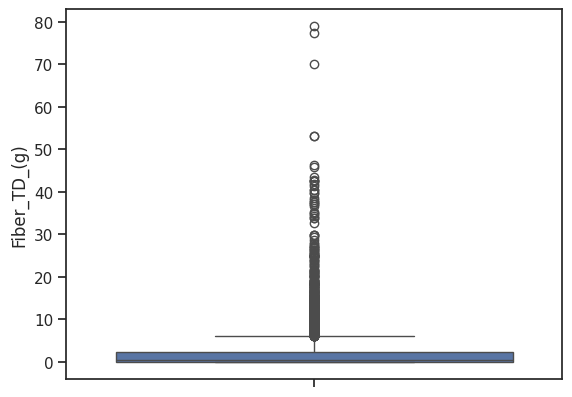

Carbohydrt_(g)


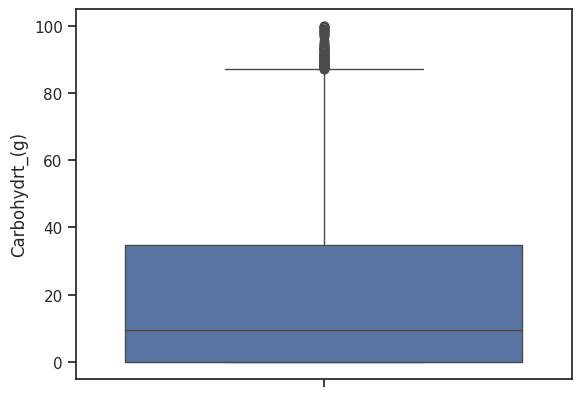

Energ_Kcal


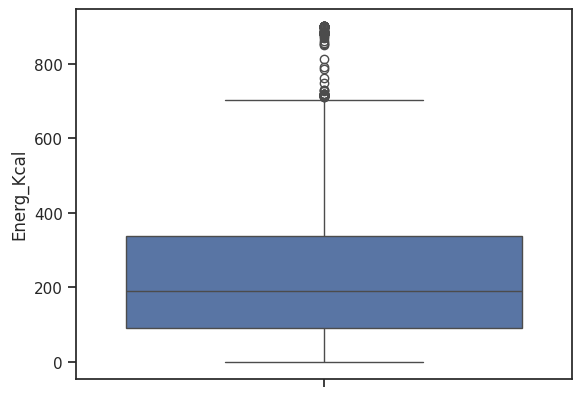

Protein_(g)


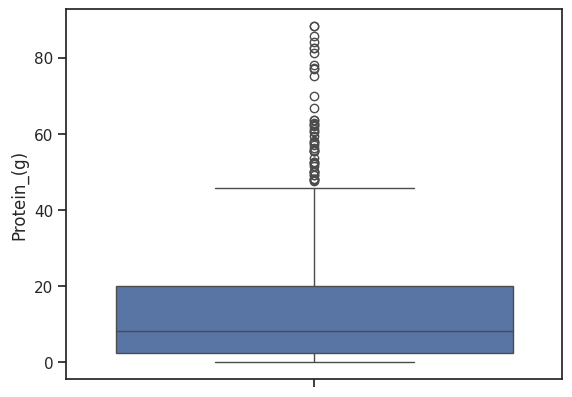

Lipid_Tot_(g)


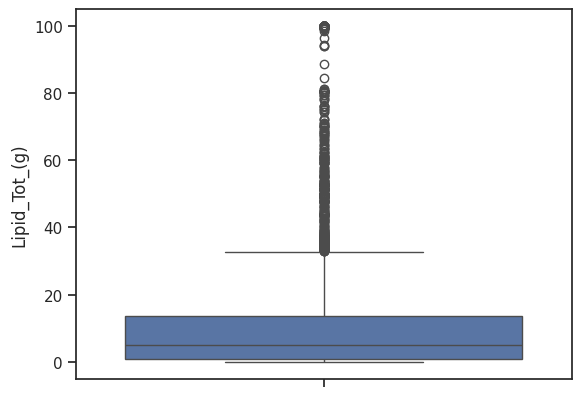

Water_(g)


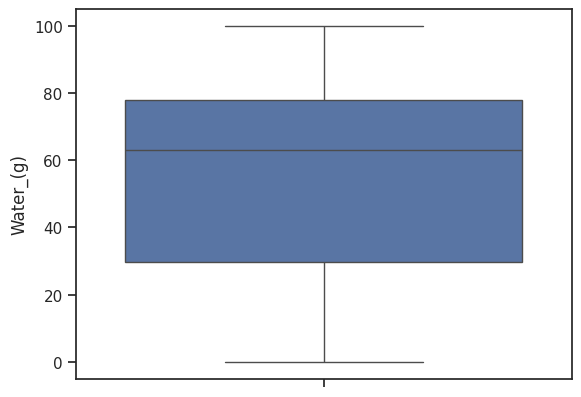

Potassium_(mg)


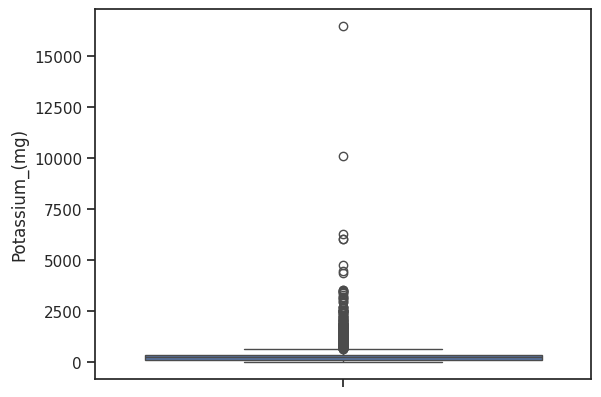

Sodium_(mg)


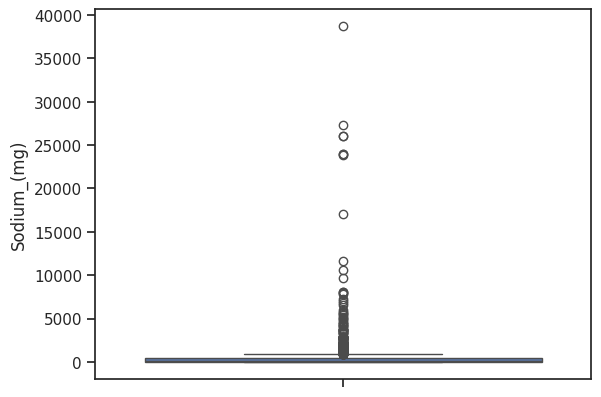

Iron_(mg)


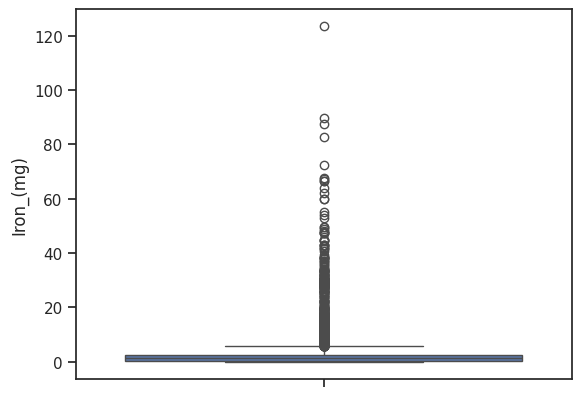

Phosphorus_(mg)


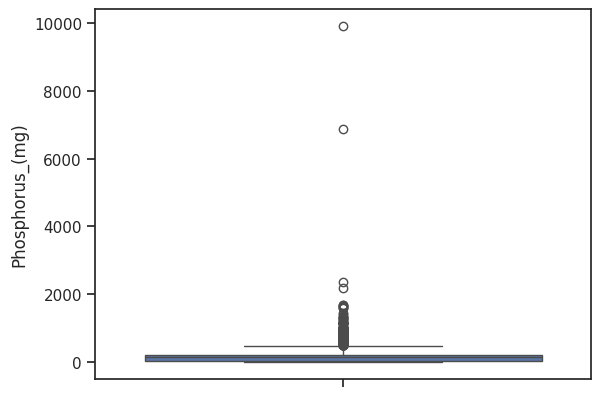

Magnesium_(mg)


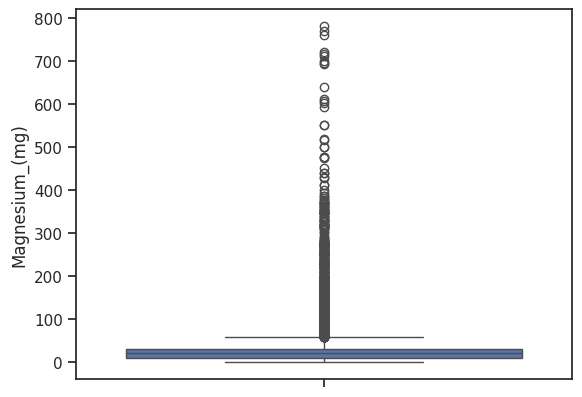

Ash_(g)


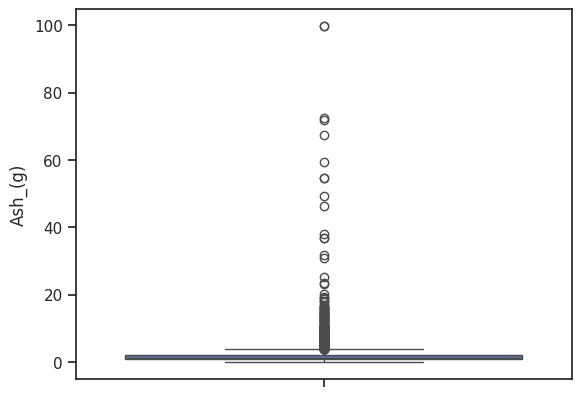

Calcium_(mg)


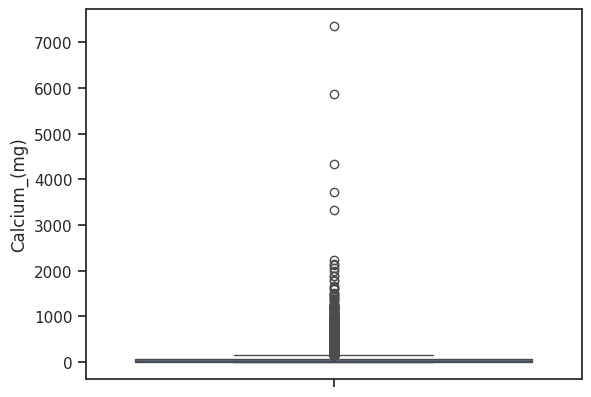

FA_Sat_(g)


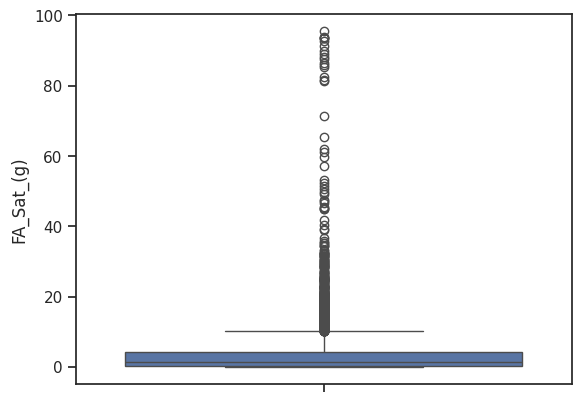

Cholestrl_(mg)


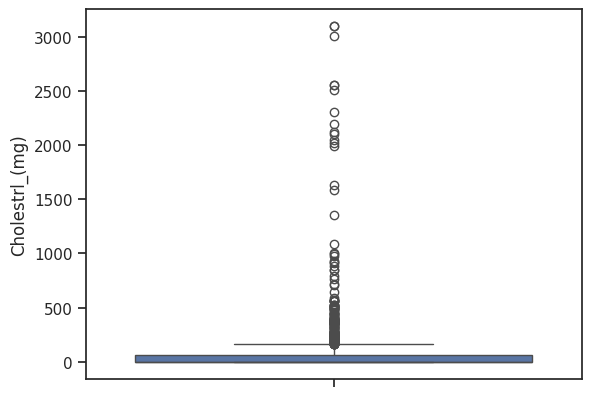

In [22]:
#Selection des variables quantitatives
quant_vars = data_final.select_dtypes(include = ['float64', 'int64'])

#Tracé des boxplots pour chaque variable quantitative
sns.set(style = 'ticks')
for var in quant_vars :
  print (var)
  sns.boxplot(y = var, data = quant_vars)
  plt.show()

###Analyse de la normalité des distributions des variables

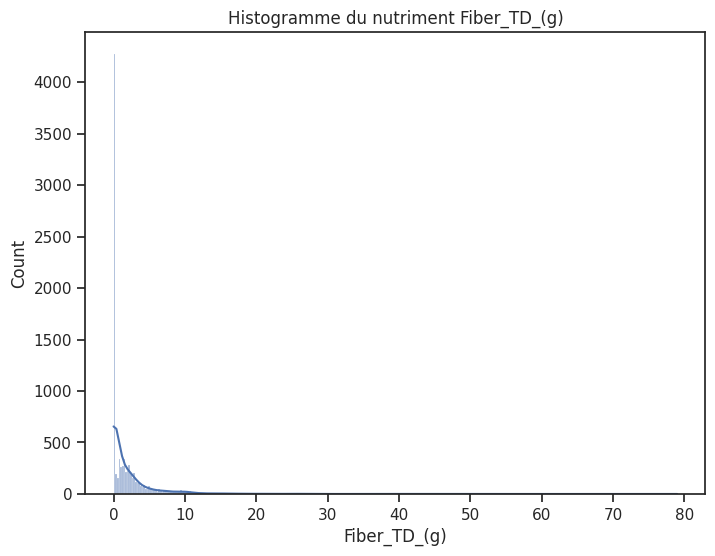

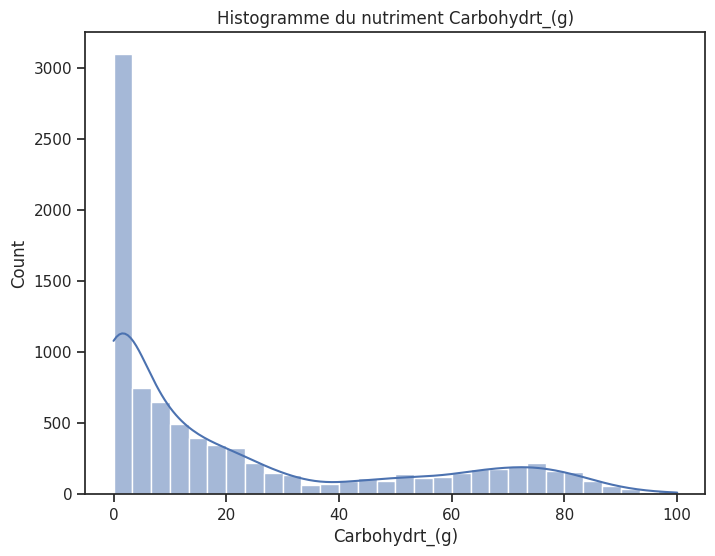

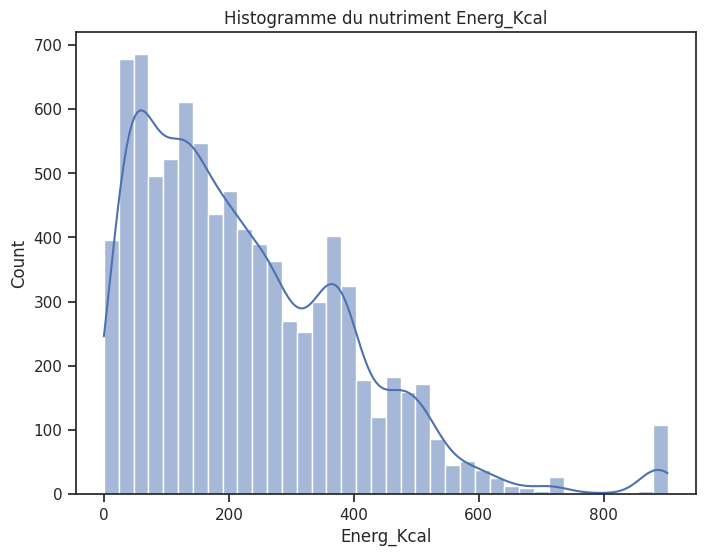

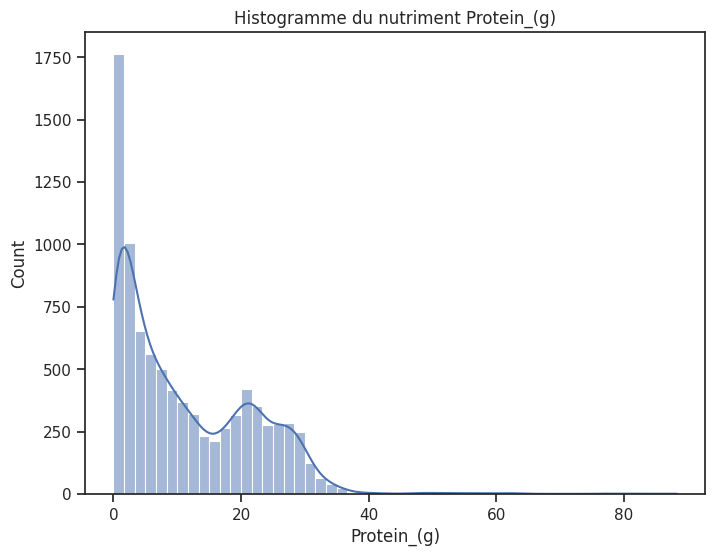

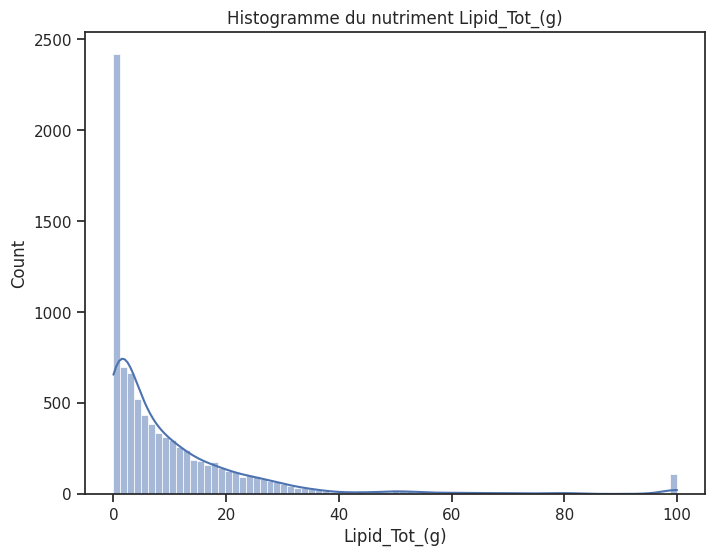

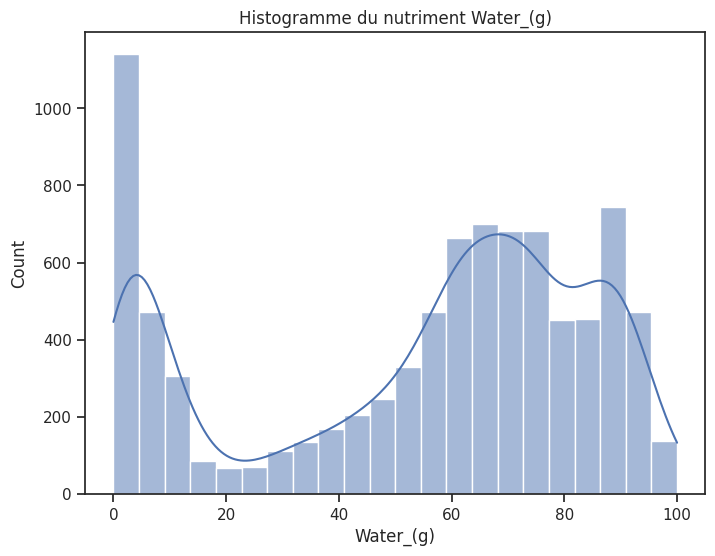

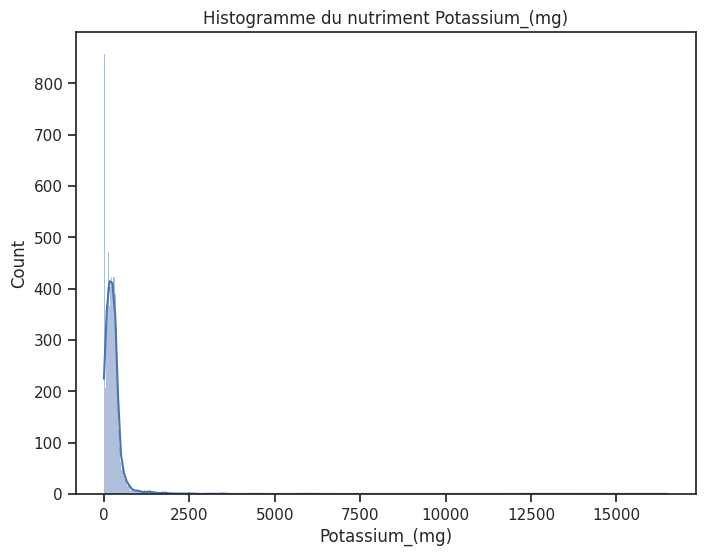

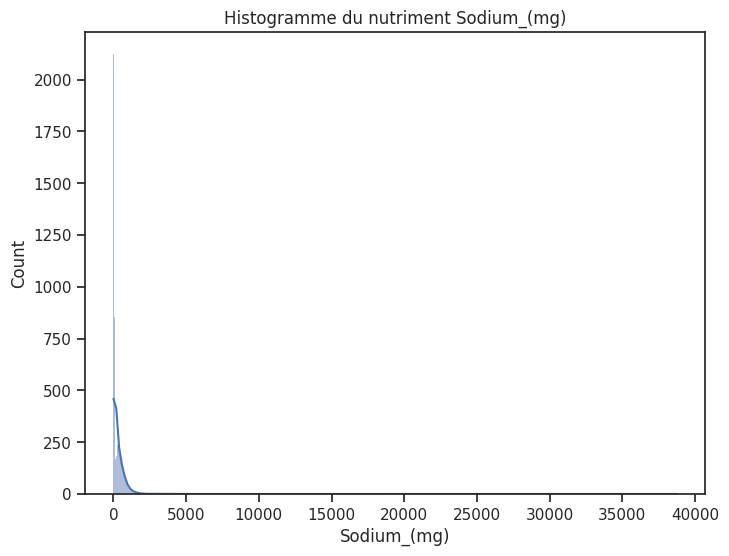

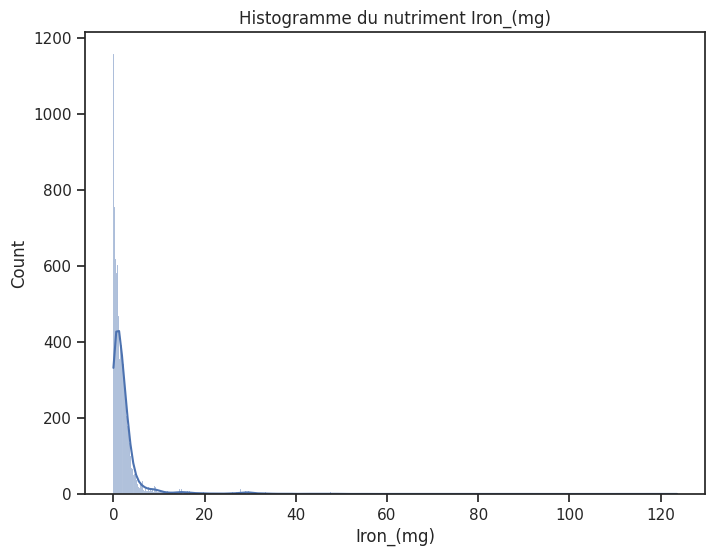

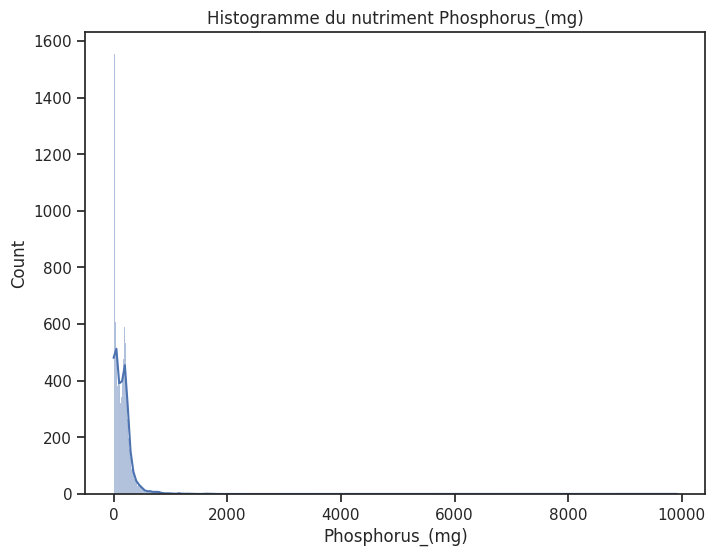

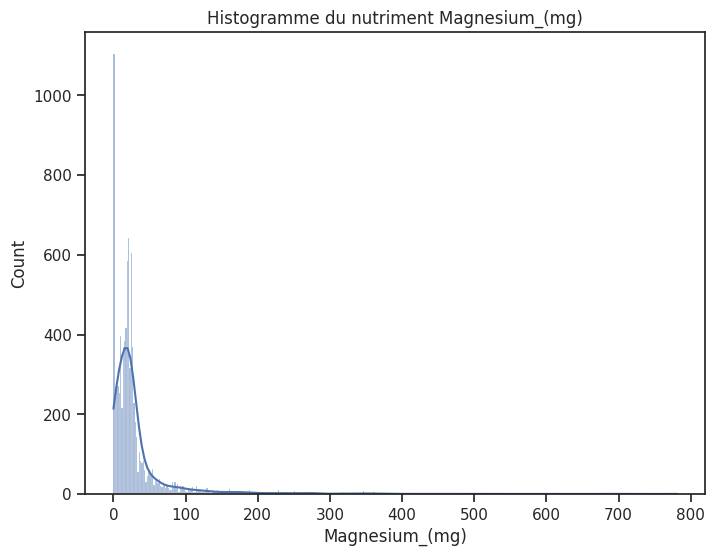

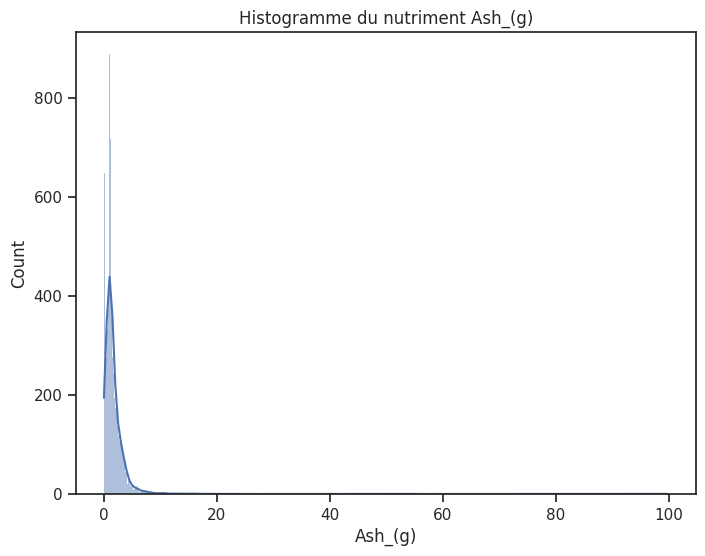

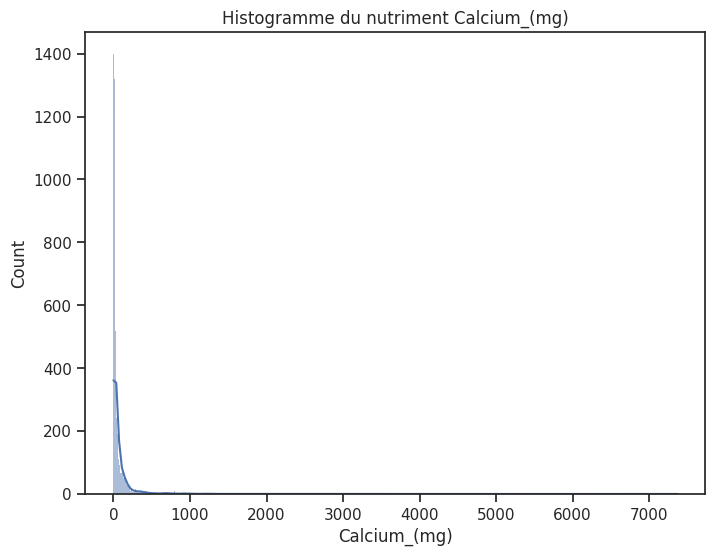

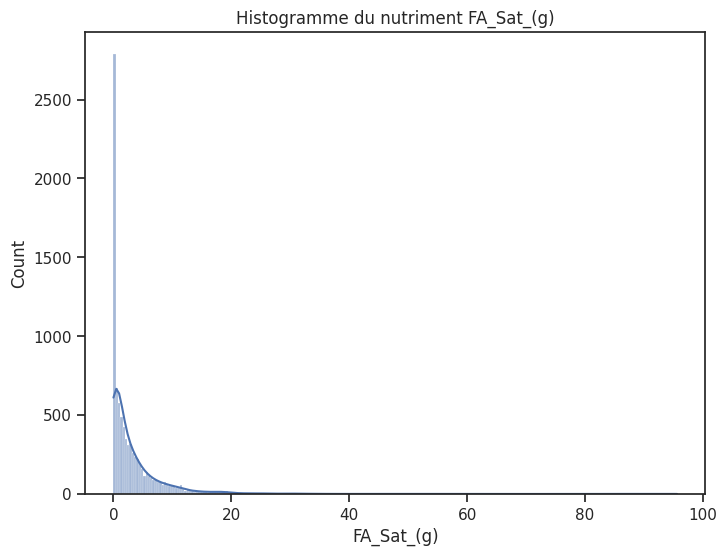

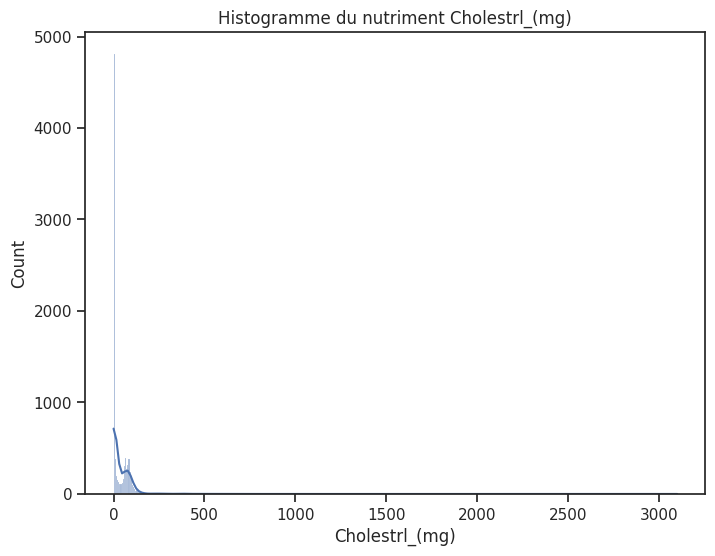

In [23]:
#Analyse visuelle de la distribution pour analyser normalité
from scipy.stats import shapiro

#Creation d'un histogramme et d'un test de normalité pour chaque variable
for column in quant_vars:
  plt.figure(figsize=(8,6))
  sns.histplot(data_final[column], kde=True)
  plt.title(f'Histogramme du nutriment {column}')
  plt.show()

In [24]:
#Initialisation du Dataframe des resultats des tests de normalités
results_normalite = pd.DataFrame(columns=['variable', 'stat', 'p-value', 'Normality'])

#Tests de normalité pour chaque variable
for column in quant_vars:
  stat, p = shapiro(data_final[column])
  if p > 0.05:
    normality = 'Oui'
  else:
    normality = 'Non'
    results_normalite = pd.concat([results_normalite, pd.DataFrame([{ 'variable': column, 'stat': stat, 'p-value': p, 'Normality': normality}])], ignore_index=True)

#Affichage des resultats
results_normalite

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8790.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-24-fc723db48a6a>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_normalite = pd.concat([results_normalite, pd.DataFrame([{ 'variable': column, 'stat': stat, 'p-value': p, 'Normality': normality}])], ignore_index=True)


variable      stat        p-value Normality
0      Fiber_TD_(g)  0.494309   1.586657e-94       Non
1    Carbohydrt_(g)  0.782918   2.094739e-75       Non
2        Energ_Kcal  0.912773   2.936818e-57       Non
3       Protein_(g)  0.876586   7.289726e-64       Non
4     Lipid_Tot_(g)  0.634299   6.156719e-87       Non
5         Water_(g)  0.888373   6.476250e-62       Non
6    Potassium_(mg)  0.422950   1.039645e-97       Non
7       Sodium_(mg)  0.210121  1.695346e-105       Non
8         Iron_(mg)  0.390641   4.867794e-99       Non
9   Phosphorus_(mg)  0.510376   9.354915e-94       Non
10   Magnesium_(mg)  0.471854   1.440699e-95       Non
11          Ash_(g)  0.320112  9.699710e-102       Non
12     Calcium_(mg)  0.316480  7.152178e-102       Non
13       FA_Sat_(g)  0.497370   2.216295e-94       Non
14   Cholestrl_(mg)  0.252909  4.294405e-104       Non

####Interpretation des resultats
Aucune des variables nutriments étudiées ne suit une loi normale.




## ANALYSE BIVARIEE

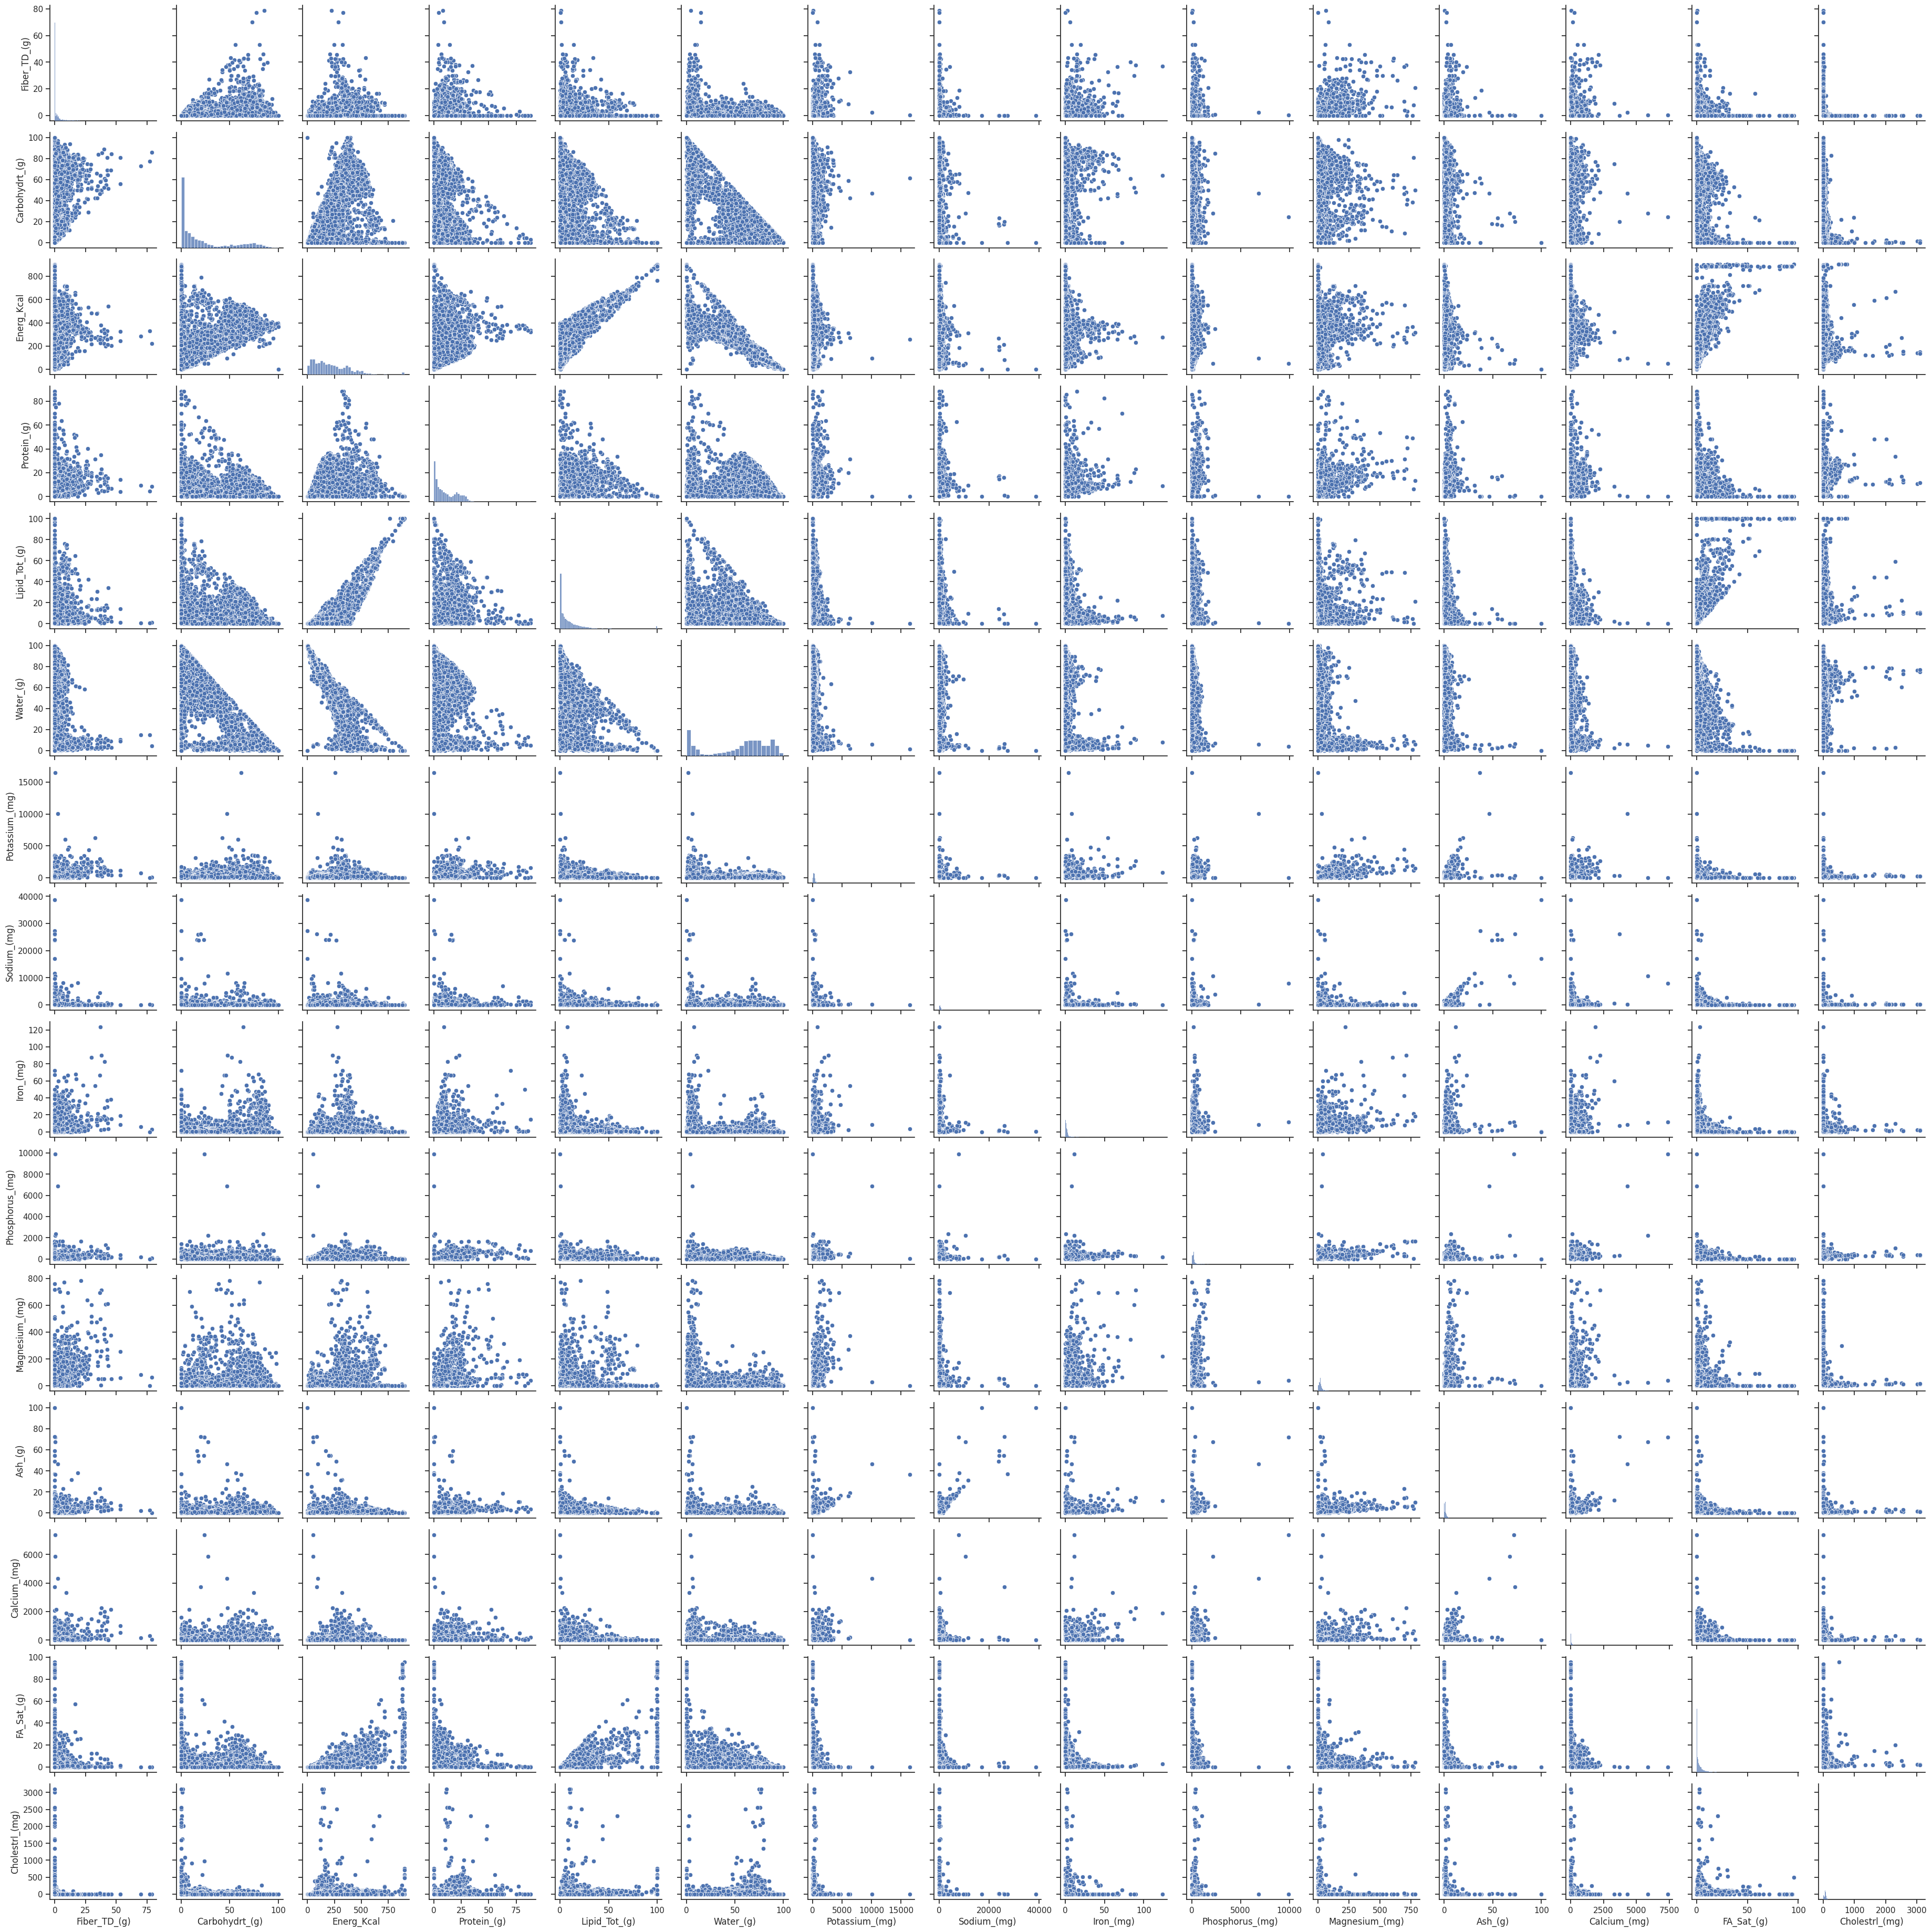

In [25]:
#Etude de la relation entre les variables

sns.pairplot(quant_vars)

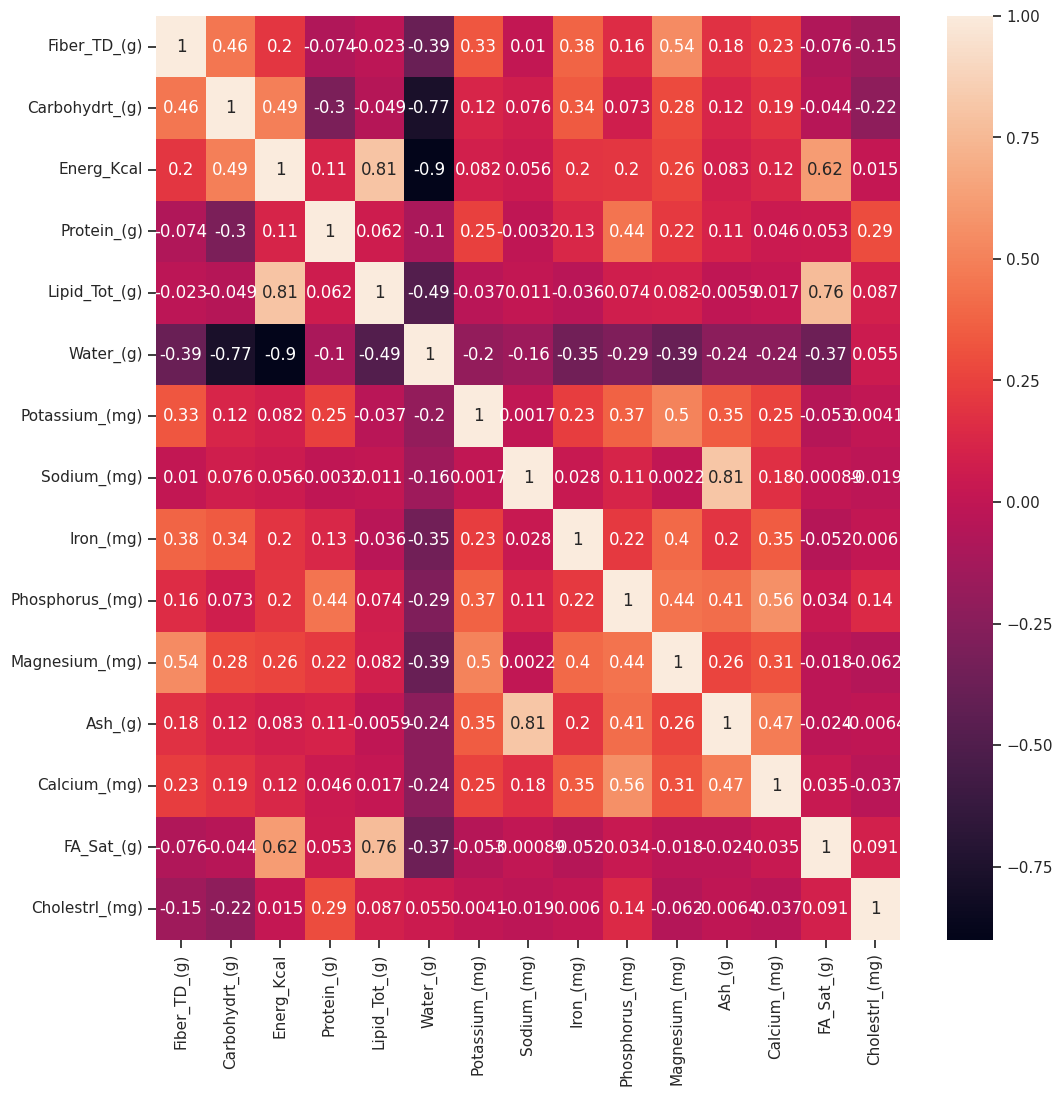

In [26]:
#Tableau de correlation et heatmap (Correlation de pearson)

#Tableau de corr
#Calcul des coef de correlation pour chaque paire de variables
corr_matrix = quant_vars.corr()

#Affichage du tableau de correlation
corr_matrix

#Heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

###Interpretation des resultats de la correlation de Pearson

- Correlation positive : les nutriments Energie exprimé en Kcal et Lipide exprimé en grammes sont positivement correlés linéairement avec un coefficient de correlation de 0.81 ; Ce constat est le meme entre les nutriments matières minerales (Ash) exprimé en gramme et sodium exprimé en milligramme (coef 0.81). Ceci dit, il semble que plus il y a des lipides dans un aliment plus cet aliment est riche en calorie. De meme, il semble que plus il y a des matières minérales dans un aliment, plus cet aliment est riche en sodium. Les nutriments acides gras saturés (FA_Sat) exprimé en grammes et lipide exprimé en grammes sont positivement corrélés linéairement avec un coef de 0.76

- Correlation negative : les nutriments Energie exprimé en calories et water exprimé en gramme sont très négativement correlés linéairement avec un coefficient de correlation de -0.9. Il semble que plus un aliment contient de l'eau, moins il contient de calories.
D'ailleurs, à quand remonte votre dernière gorgée d'eau ?  ;-)
De meme, les nutriments water et carbohydrt exprimé en gramme sont négativement correlés linéairement avec un coefficient de correlation de -0.77; Il semble que plus un aliment contient de l'eau, moins il contient de glucides

- Pas de correlation : il n'y a pas de correlation linéaire entre la quantité de potassium et de cholesterol dans un aliment avec un coefficent de 0.0041. De meme entre les lipides et les matières minerales (coeff de 0.0059) et entre le fer et le cholesterol (0.006).

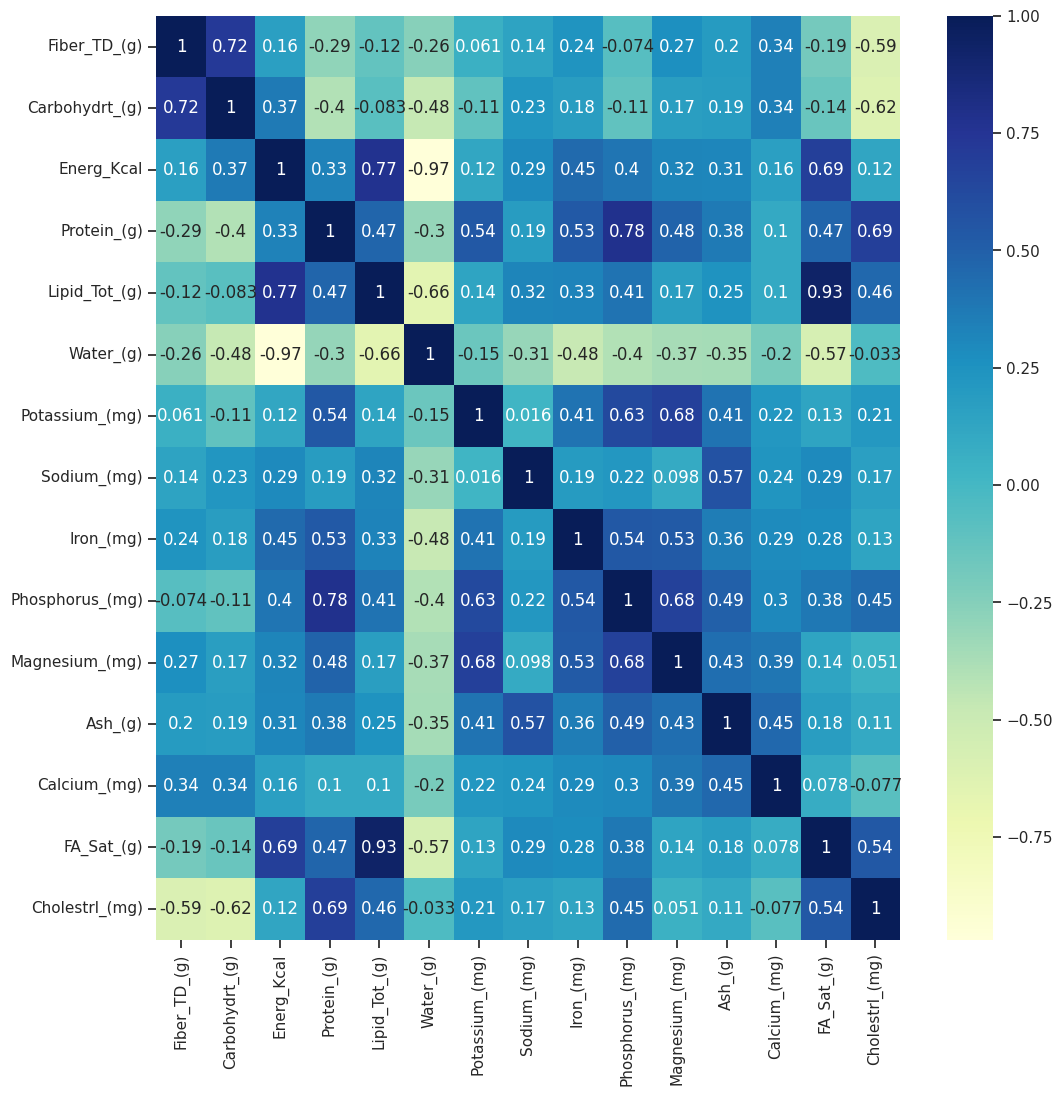

In [27]:
#Tableau de correlation et heatmap (Correlation de spearman)

#Tableau de corr
#Calcul des coef de correlation pour chaque paire de variables
corr_matrix = quant_vars.corr(method='spearman')

#Affichage du tableau de correlation
corr_matrix

#Heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

###Interpretation des resultats de la correlation de Spearman

Le test de correlation de Spearman vient confirmer certaines correlations relevées par le test de Pearson.

- Correlation positive : Notamment celle entre les calories et les lipides avec un coefficent de 0.77; cependant le coefficient de pearson étant supérieur au coefficient de Spearman (0.81 > 0.77), il semble que la correlation est plus linéaire qu'autre chose. A contrario, entre le FA_sat et les lipides, le coefficeint de Spearman est superieur à celui de pearson (0.93 > 0.76), il semble que la relation est plus monotone croissante qu'autre chose.
Nouvelle correlation positive : Spearman revèle une correlation monotone croissante entre le phosphore et les protéines avec un coefficient de 0.78

- Correlation negative : Spearman confirme que l'eau et les calories sont très négativement correlés avec un coefficient de -0.97



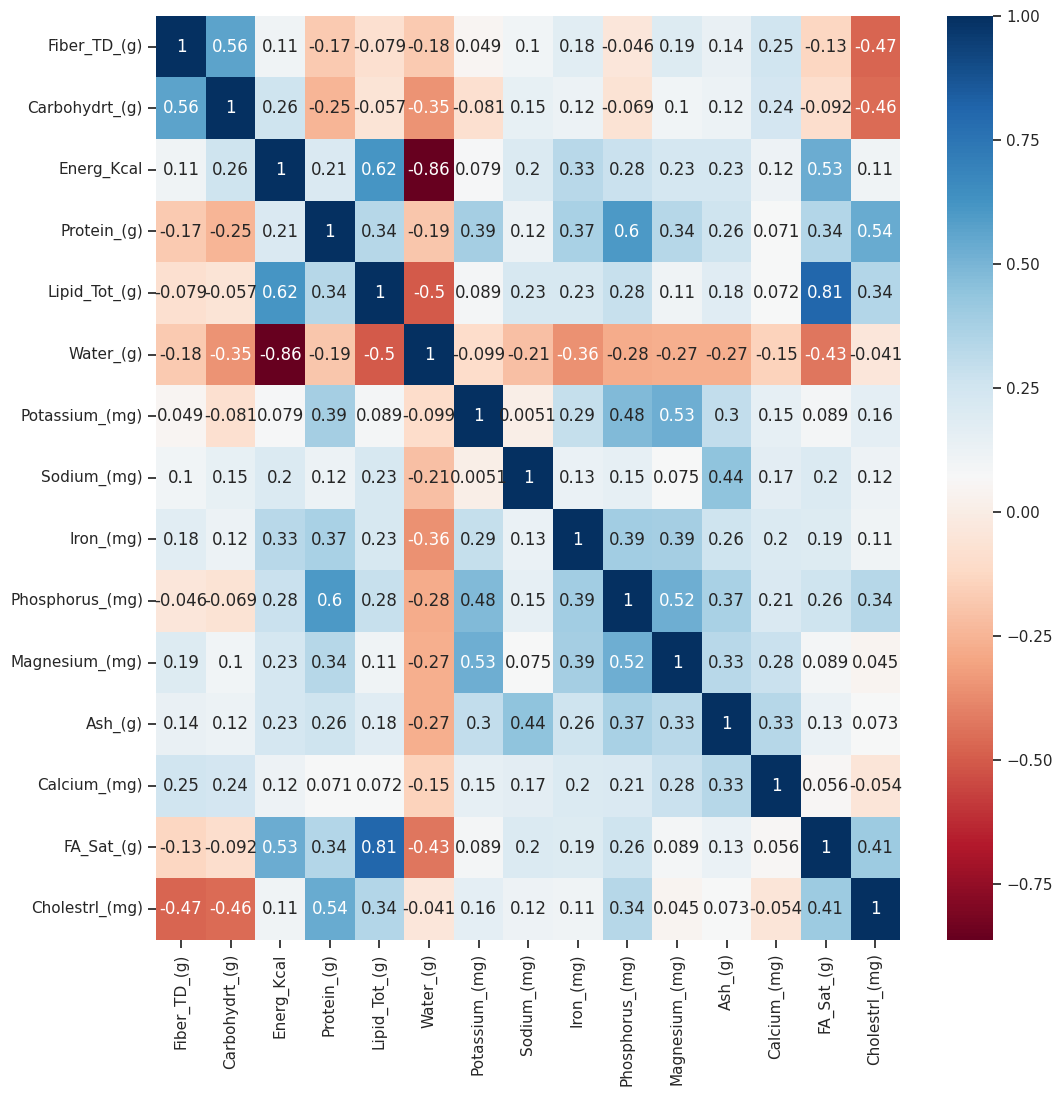

In [28]:
#Tableau de correlation et heatmap (Correlation de Kendall)

#Tableau de corr
#Calcul des coef de correlation pour chaque paire de variables
corr_matrix = quant_vars.corr(method='kendall')

#Affichage du tableau de correlation
corr_matrix

#Heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.show()

##ANALYSE MULTIVARIEE

Utiliser une ACP pour réaliser une analyse multivariée dans le but d'analyser simultanément plusieurs variables, étudier les relations entre les variables et trouver éventuellement des relations cachées.

In [29]:
#L'ACP se fait sur des variables quantitatives et en general, si on a des variables qualitatives, on les utilise pour illustrer les analyses
#Separation des données en variables quantitatives (X) et qualitatives (Y)

#X = data_final.drop('Shrt_Desc', axis = 1)
#X.values
#Y = data_final['Shrt_Desc']
#Y.values
X = data_final.iloc[:, 1:].values
Y = data_final.iloc[:, 0].values
#X
#X.shape[1]

In [30]:
#Normalisation des donnees pour eviter l'effet taille
from sklearn.preprocessing import StandardScaler

#Creer un objet scaler de la classe StandardScaler
scaler = StandardScaler()

#Utiliser la methode fit_transform() sur l'objet scaler pour normaliser les données X
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.47792556, -0.80925192,  2.88861189, ..., -0.24849234,
         7.45956782,  1.50222909],
       [-0.47792556, -0.70620553,  2.89449882, ..., -0.25349218,
         6.52925508,  1.5874469 ],
       [-0.47792556, -0.8114522 ,  3.82463349, ..., -0.34848903,
         9.10232147,  1.85162211],
       ...,
       [-0.47792556,  1.87068771,  0.25126803, ..., -0.30349052,
        -0.53446113, -0.32995387],
       [-0.47792556, -0.73810957, -0.80249213, ..., -0.31849003,
        -0.47828132,  0.09613519],
       [-0.47792556, -0.8114522 , -0.80837906, ...,  0.2214921 ,
        -0.51469704,  0.09613519]])

In [31]:
#ACP #Reduction de dimension
from sklearn.decomposition import PCA

#Creer un objet pca de la classe PCA
pca = PCA()

#Utiliser la methode fit_transform() sur l'objet pca pour reduire la dimension des donnees
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.51280000e+00,  7.69733880e+00, -2.59054065e+00, ...,
         1.44515741e-01, -3.30363347e-02, -1.87709177e-02],
       [-2.30294556e+00,  7.23135675e+00, -2.29931059e+00, ...,
         4.57157408e-02,  3.51407891e-02,  1.46819571e-02],
       [-3.19343129e+00,  9.88959755e+00, -2.82588243e+00, ...,
         9.21601549e-02, -3.84702575e-02, -2.34515271e-02],
       ...,
       [ 4.50824756e-02,  3.97330247e-01,  2.17332497e+00, ...,
         2.22840027e-01, -1.03184952e-01, -3.16605745e-02],
       [-2.74471530e-01, -1.75030828e+00, -6.11796905e-01, ...,
        -4.49834972e-02,  5.63801313e-02,  1.98096332e-02],
       [ 1.25265505e+00, -9.24791604e-01, -8.59128600e-01, ...,
         4.25768833e-03,  1.64347914e-03, -4.02522612e-03]])

In [32]:
# prompt: que fait pca.fit_transform en français

# La méthode `pca.fit_transform(X_scaled)` effectue deux opérations :
# 1. `fit()`: Apprentissage de l'ACP sur les données `X_scaled`.  Cette étape calcule les composantes principales (les axes de projection) et les valeurs propres qui représentent la variance expliquée par chaque composante.  Elle apprend la structure des données sans les transformer.
# 2. `transform()`: Projection des données `X_scaled` sur les composantes principales apprises à l'étape précédente. Cela produit un nouveau jeu de données `X_pca` où chaque observation est représentée par ses coordonnées sur les nouvelles composantes principales (axes de l'espace réduit).  L'objectif est de réduire la dimensionnalité des données tout en conservant un maximum d'information.
# En résumé : `pca.fit_transform()` apprend l'ACP sur les données puis les projette sur les composantes principales, ce qui donne une représentation de données de dimension réduite.


###Composantes principales ou axes factorielles

In [33]:
#Composantes principales ou axes factorielles

p = len(vars_list)
comp_princ = pd.DataFrame(
        {
            "Dimension" : ["Dim" + str(i+1) for i in range(p)],
            "Valeur propre" : pca.explained_variance_,
            "% Var expliquée" : np.round(pca.explained_variance_ratio_ * 100),
            "Cumul % Var expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100),
        },
        columns = ["Dimension", "Valeur propre", "% Var expliquée", "Cumul % Var expliquée"]

        )
comp_princ

Dimension  Valeur propre  % Var expliquée  Cumul % Var expliquée
0       Dim1       4.120310             27.0                   27.0
1       Dim2       2.584770             17.0                   45.0
2       Dim3       1.976947             13.0                   58.0
3       Dim4       1.621340             11.0                   69.0
4       Dim5       0.928928              6.0                   75.0
5       Dim6       0.871009              6.0                   81.0
6       Dim7       0.722670              5.0                   85.0
7       Dim8       0.663105              4.0                   90.0
8       Dim9       0.534408              4.0                   93.0
9      Dim10       0.375911              3.0                   96.0
10     Dim11       0.260923              2.0                   98.0
11     Dim12       0.257241              2.0                   99.0
12     Dim13       0.078823              1.0                  100.0
13     Dim14       0.003850              0.0                  100.0
14     Dim15       0.001472              0.0                  100.0

Text(3.25, 26, '25%')

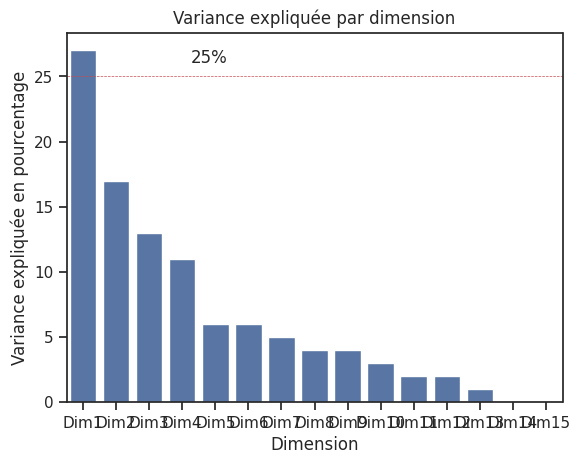

In [34]:
#Scree plot pour choisir le nombre de composantes principales par la methode du coude (elbow methode)

g_comp = sns.barplot(x = "Dimension", y = "% Var expliquée", data = comp_princ)

#Amelioration du graphique
g_comp.set_ylabel("Variance expliquée en pourcentage")
g_comp.set_title("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = 'r', linestyle = "--")
plt.text(3.25,26,"25%")
#plt.show()

####Interpretation
Choix du nombre d'axe : nous avons 15 composantes principales ou axes factorielles, chacune étant une combinaison des variables nutriments.
La première composante explique 27% de la variance, la seconde en explique moins (17%) et ainsi de suite jusqu'à la derniere composante (0%).
La prochaine étape est donc de choisir le nombre d'axe qui explique le maximum de la variance sur les 15 axes.
Selon la règle du coude, nous pouvons choisir 4 axes factorielles. En chiffre, cela donne 69% de la variance expliquée.

###AIDE A L'INTERPRETATION
La qualité de representation des variables et la contribution à la formation des axes.
En ACP, il est important de mesurer la qualité de representation des variables sur les axes principaux et leur contribution à la formation de ces axes.



###Qualité de representation des variables

In [35]:
#qualite de representation des variables

#La qualité de représentation des variables est souvent mesurée à l'aide du carré du cosinus de l'angle
#entre les vecteurs représentant les variables et les axes principaux. Le cosinus carré est également appelé cos2.
#Pour une variable donnée, la somme des cos2 sur tous les axes principaux est égale à 1.
#Un seuil couramment utilisé pour interpréter la qualité de représentation des variables est 0,5. Si le cos2 d'une
#variable est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien la variable.

#Calcul du cosinus carre des variables
cos_square = np.square(pca.components_)

#Creation d'un dataframe avec le cosinus carre
cos_square_df = pd.DataFrame(cos_square, columns = ["PC{}".format(i+1) for i in range (X.shape[1])])
cos_square_df.index = data_final.columns[1:]
print(cos_square_df)

#Affichage du dataframe
#cos_square_df



                      PC1       PC2           PC3       PC4       PC5  \
Fiber_TD_(g)     0.074317  0.083878  1.292469e-01  0.010437  0.041218   
Carbohydrt_(g)   0.024808  0.000257  1.658025e-01  0.004411  0.237452   
Energ_Kcal       0.095117  0.223912  2.402080e-04  0.216370  0.035251   
Protein_(g)      0.020943  0.007655  1.240766e-04  0.100461  0.000964   
Lipid_Tot_(g)    0.007833  0.088619  4.431126e-03  0.024845  0.044575   
Water_(g)        0.037276  0.000009  2.148415e-03  0.050230  0.000023   
Potassium_(mg)   0.141588  0.075969  1.848766e-02  0.147911  0.035715   
Sodium_(mg)      0.004877  0.054566  6.168001e-08  0.159356  0.002820   
Iron_(mg)        0.264434  0.016043  5.672112e-04  0.014807  0.003263   
Phosphorus_(mg)  0.310888  0.000041  5.910739e-04  0.106081  0.013187   
Magnesium_(mg)   0.000254  0.039121  5.722260e-02  0.007807  0.166368   
Ash_(g)          0.016341  0.021950  5.377148e-03  0.099776  0.096567   
Calcium_(mg)     0.000414  0.000125  7.361455e-08  

In [36]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos_square_df,axis=1))


Fiber_TD_(g)       1.0
Carbohydrt_(g)     1.0
Energ_Kcal         1.0
Protein_(g)        1.0
Lipid_Tot_(g)      1.0
Water_(g)          1.0
Potassium_(mg)     1.0
Sodium_(mg)        1.0
Iron_(mg)          1.0
Phosphorus_(mg)    1.0
Magnesium_(mg)     1.0
Ash_(g)            1.0
Calcium_(mg)       1.0
FA_Sat_(g)         1.0
Cholestrl_(mg)     1.0
dtype: float64


<ipython-input-37-ee1621a45984>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-37-ee1621a45984>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-37-ee1621a45984>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-37-ee1621a45984>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


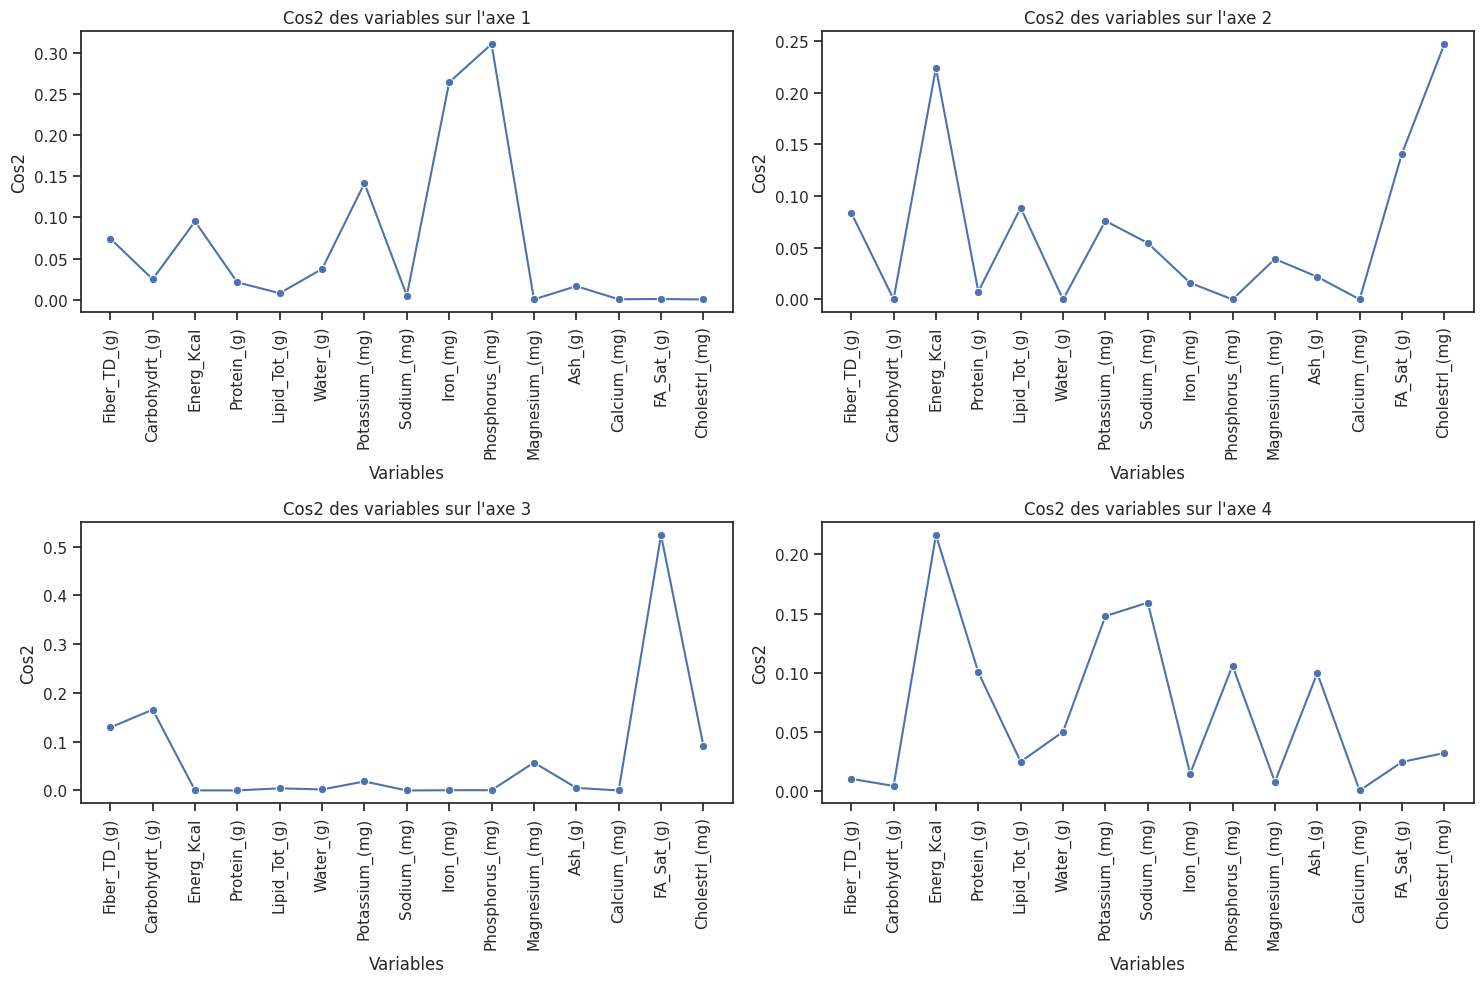

In [37]:
#Afficher les cos_square sur des graphiques

# prompt: faire un graphique en courbes pour afficher sur des subplots l'evolution des cos2 des variables  sur les 4 premiers axes factoriels

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i in range(4):    #nombre d'axe choisi
    sns.lineplot(x=cos_square_df.index, y=cos_square_df[f"PC{i+1}"], ax=axes[i], marker = 'o')
    axes[i].set_title(f"Cos2 des variables sur l'axe {i+1}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel("Variables")
    axes[i].set_ylabel("Cos2")

plt.tight_layout()
plt.show()

####Interpretation de la qualité de représentation des variables
- Sur l'axe 1, la variable phosphore est la mieux representée avec un cos2 de 0.31, suivie de la variable Iron avec un cos2 de 0.26.
- Sur l'axe 2, la variable cholesterol est la mieux representée avec un cos2 de 0.24, suivie de la variable calorie avec un cos2 de 0.22.
- Sur l'axe 3, la variable FA_Sat qui represente la quantité d'acide gras saturé est la seule variable representée avec un cos2 de 0.52.
- Sur l'axe 4, la variable calorie est la mieux representée avec un cos2 de 0.21.

En général, nous n'avons pas une bonne qualité de representation des variables sur les axes factorielles, sauf pour la variable FA_Sat sur l'axe 3.


###Contribution des variables à la formation des axes

In [38]:
#Contribution des variables à la formation des axes

#La contribution des variables à la formation des axes indique l'importance relative de chaque variable pour
#expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage
#la somme des contributions des variables sur un axe principal donné est égale à 100 %.

n = X.shape[0]  #nbre observation
p = X.shape[1]  #nbre variable

#Valeurs propres
eigenvalues = pca.explained_variance_

#Matrice des correlations variables-axes
corvar = np.zeros((p,p))

#Calcul des correlations
for j in range(p):
  corvar[:, j] = pca.components_[j,:] * np.sqrt(eigenvalues[j])

var_contribution = corvar**2  #les contributuions sont proportionnelles au carré des correlations

for j in range(p):
  var_contribution[:, j] = var_contribution[:, j]/(eigenvalues[j])

var_contribution_df = pd.DataFrame(var_contribution,
                                    columns=["PC{}_Contrib".format(i+1) for i in range(p)],
                                        index=data_final.columns[1:])
print(var_contribution_df)

#vérifions la théorie somme des contributions des variables à un axe = 100%
print(np.sum(var_contribution,axis=0))

                 PC1_Contrib  PC2_Contrib  PC3_Contrib  PC4_Contrib  \
Fiber_TD_(g)        0.074317     0.024808     0.095117     0.020943   
Carbohydrt_(g)      0.083878     0.000257     0.223912     0.007655   
Energ_Kcal          0.129247     0.165803     0.000240     0.000124   
Protein_(g)         0.010437     0.004411     0.216370     0.100461   
Lipid_Tot_(g)       0.041218     0.237452     0.035251     0.000964   
Water_(g)           0.176705     0.046784     0.021845     0.001472   
Potassium_(mg)      0.054979     0.059754     0.009207     0.052441   
Sodium_(mg)         0.016866     0.020914     0.029572     0.424482   
Iron_(mg)           0.067689     0.026533     0.015750     0.025628   
Phosphorus_(mg)     0.079428     0.039114     0.107173     0.016159   
Magnesium_(mg)      0.106671     0.033344     0.001503     0.076675   
Ash_(g)             0.063414     0.074808     0.051153     0.231826   
Calcium_(mg)        0.070822     0.049910     0.012486     0.008834   
FA_Sat

<ipython-input-39-4e1a9cab9265>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-39-4e1a9cab9265>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-39-4e1a9cab9265>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-39-4e1a9cab9265>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


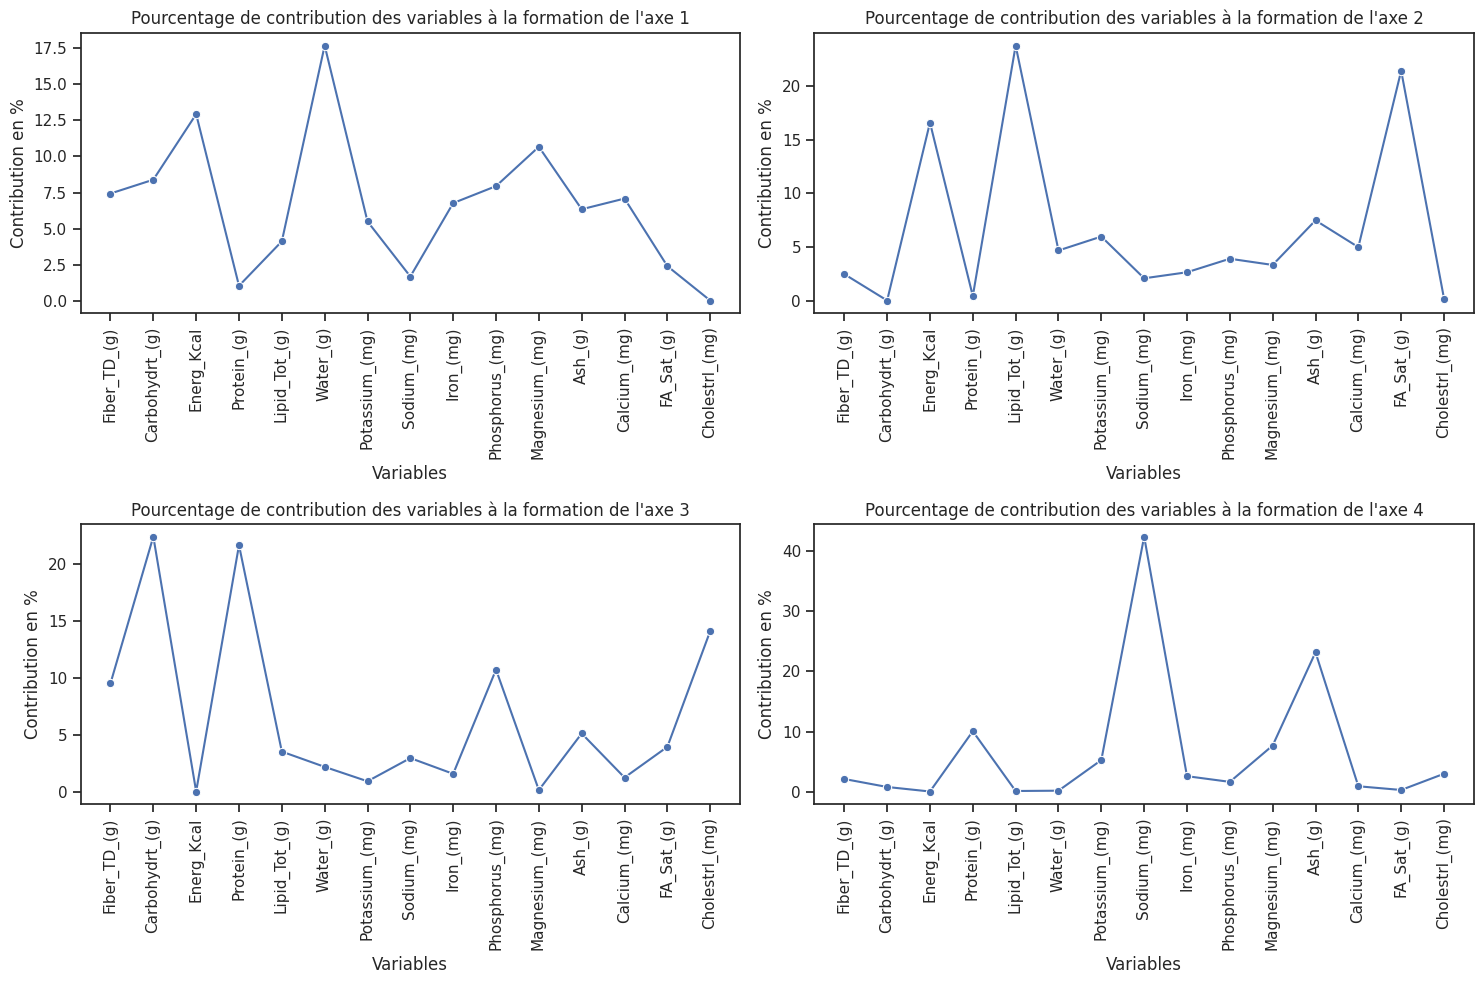

In [39]:
#Afficher les contributions sur des graphiques

# prompt: faire un graphique en courbes pour afficher sur des subplots l'evolution des contributions des variables  sur les 4 premiers axes factoriels

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i in range(4):  #nombre d'axe choisi
    sns.lineplot(x=var_contribution_df.index, y=var_contribution_df[f"PC{i+1}_Contrib"] * 100, ax=axes[i], marker='o')
    axes[i].set_title(f"Pourcentage de contribution des variables à la formation de l'axe {i+1}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel("Variables")
    axes[i].set_ylabel("Contribution en %")

plt.tight_layout()
plt.show()

####Interpretation de la contributions des variables à la formation des axes principaux

- La variable Water contribue à 17.67% dans la formation de l'axe 1, suivie de l'Energie_KCal à 13%
- La variable Lipide contribue à 23.7% dans la formation de l'axe 2, suivie de FA_Sat à 21.4%
- La variable Carbohydrt contribue à 22.39% dans la formation de l'axe 3, suivie de Protein à 21.63%
- La variable Sodium contribue à 42.44% dans la formation de l'axe 4, suivie de Ash(matière minerale) à 23.18%

In [40]:
#Qualité de representation des individus

cos_square_ind = np.square(X_pca)
di = np.sum(cos_square_ind, axis = 1)   #di represente l'inertie pour chaque individu

for j in range(p):
  cos_square_ind[:,j] = cos_square_ind[:,j]/di
cos_square_ind_df = pd.DataFrame(cos_square_ind, columns=["PC{}".format(i+1) for i in range(X.shape[1])])
print(cos_square_ind_df)

#vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos_square_ind,axis=1))

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.069287  0.650153  0.073640  0.021082  0.018155  0.002062  0.102834   
1     0.069230  0.682602  0.069012  0.019075  0.012385  0.001784  0.101755   
2     0.072968  0.699806  0.057138  0.003840  0.016625  0.003503  0.089448   
3     0.207940  0.053366  0.421336  0.072298  0.038020  0.125387  0.002518   
4     0.183008  0.063549  0.356731  0.008971  0.023493  0.268367  0.000184   
...        ...       ...       ...       ...       ...       ...       ...   
8785  0.129485  0.025797  0.251693  0.456122  0.000323  0.114281  0.007403   
8786  0.043794  0.312271  0.353249  0.001282  0.001574  0.007433  0.155978   
8787  0.000258  0.020025  0.599122  0.042645  0.144573  0.005711  0.082589   
8788  0.004025  0.163693  0.019999  0.163893  0.048974  0.030718  0.004125   
8789  0.417172  0.227373  0.196231  0.062952  0.000190  0.019708  0.027289   

           PC8       PC9      PC10      PC11      PC12      PC1

In [41]:
#contributions des individus à la formation des axes

ind_contribution = X_pca**2
for j in range(p):
   ind_contribution[:,j] = ind_contribution[:,j]/(n*eigenvalues[j])

ind_contribution_df = pd.DataFrame(ind_contribution,
                                    columns=["PC{}_Contrib".format(i+1) for i in range(X.shape[1])])

print(ind_contribution_df)
#vérifions la théorie
print(np.sum(ind_contribution,axis=0).round())


       PC1_Contrib  PC2_Contrib  PC3_Contrib   PC4_Contrib   PC5_Contrib  \
0     1.743400e-04     0.002608     0.000386  1.348075e-04  2.026262e-04   
1     1.464362e-04     0.002302     0.000304  1.025359e-04  1.161971e-04   
2     2.815765e-04     0.004305     0.000460  3.765743e-05  2.845575e-04   
3     1.044597e-04     0.000043     0.000441  9.229754e-05  8.471575e-05   
4     1.115058e-04     0.000062     0.000453  1.389071e-05  6.349001e-05   
...            ...          ...          ...           ...           ...   
8785  1.395681e-04     0.000044     0.000565  1.249402e-03  1.546503e-06   
8786  6.195387e-06     0.000070     0.000104  4.607976e-07  9.879348e-07   
8787  5.611730e-08     0.000007     0.000272  2.359086e-05  1.395891e-04   
8788  2.080060e-06     0.000135     0.000022  2.152274e-04  1.122524e-04   
8789  4.332556e-05     0.000038     0.000042  1.661472e-05  8.735380e-08   

      PC6_Contrib   PC7_Contrib   PC8_Contrib   PC9_Contrib  PC10_Contrib  \
0        0

###REPRESENTATION GRAPHIQUE ET INTERPRETATION


In [56]:
#Tracé de graphe de correlation
def correlation_graph(pca,x_y,features) :
  """
  Affiche un graphique de correlation entre les composantes principales et les variables
  pca : resultat du fit sur l'objet PCA
  x_y : le couple x,y des plans à afficher
  features : liste des dimensions à representer
  """
  # Extrait x et y
  x,y = x_y
  # Taille image
  fig, axes = plt.subplots(figsize=(15, 10))
  #Pour chaque composante :
  for i in range(p):
    #Les fleches
    axes.arrow(0,0,
             pca.components_[x,i],
             pca.components_[y,i],
             head_width=0.05,
             head_length=0.05,
             width = 0.02,
             color='b',
             )
    #Les labels
    plt.text(pca.components_[x,i] + 0.03,
             pca.components_[y,i] + 0.03,
             features[i], fontsize=12, weight = 'bold', color='b')

  #Affichage des lignes horizontales et verticales
  plt.plot([-1,1],[0,0], color = 'gray', ls='--')
  plt.plot([0,0],[-1,1], color = 'gray', ls='--')

  #Nom des axes et pourcentage d'inertie expliqué
  plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
  plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

  # Titre du graphe
  plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

  # Le cercle
  an = np.linspace(0, 2 * np.pi, 100)
  plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

 # Axes et display
  plt.axis('equal')
  plt.savefig('CorrGraph_{}.jpg'.format(x_y), bbox_inches='tight')
  plt.show(block=False)


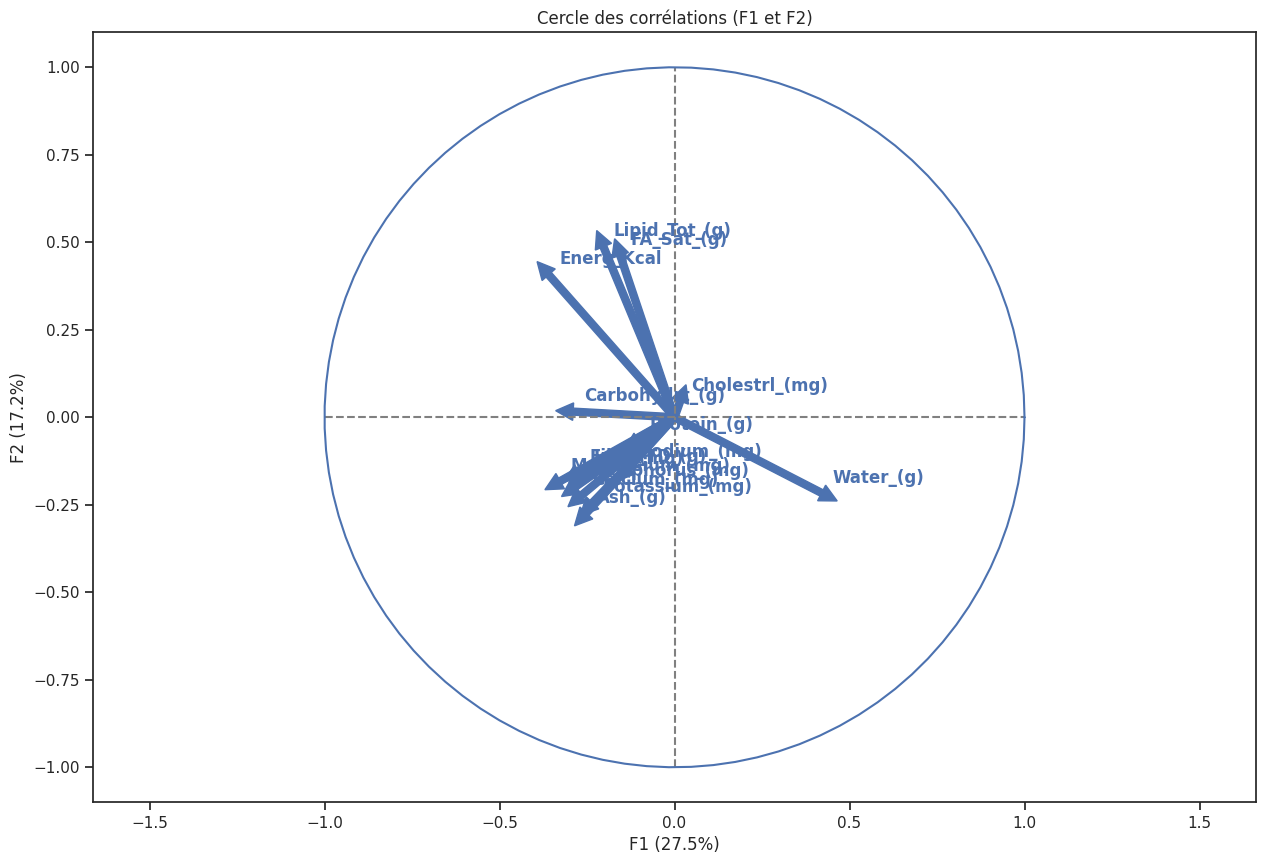

In [57]:
#Pour F1 et F2
x_y = (0,1)
x_y
correlation_graph(pca,x_y,vars_list)

Le cercle des correlations de l'ACP entre F1 et F2 confirme les observations de l'analyse bivariée.

- Les nutriments FA_Sat, Lipide et Calorie se ressemblent et sont tous opposés à l'eau

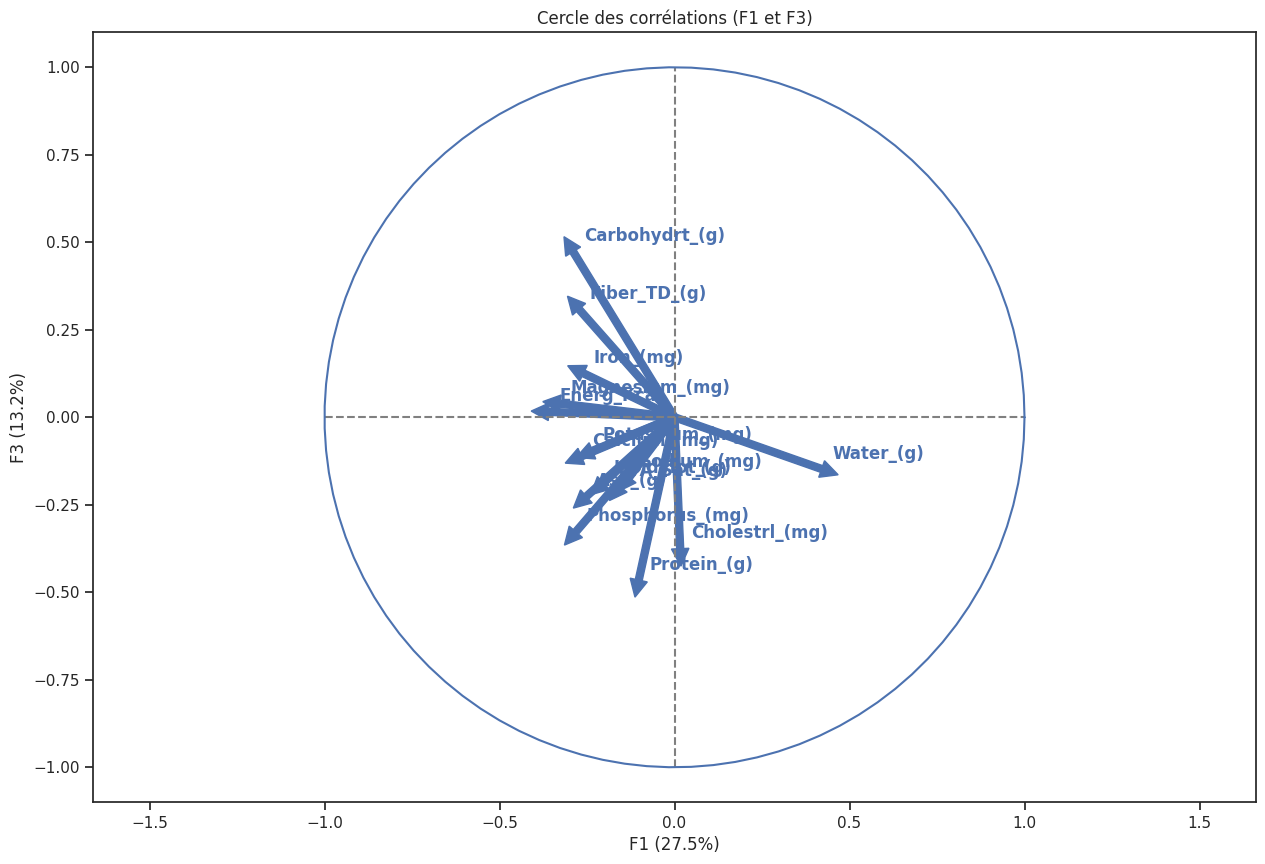

In [58]:
#Pour F1 et F3
x_y = (0,2)
x_y
correlation_graph(pca,x_y,vars_list)

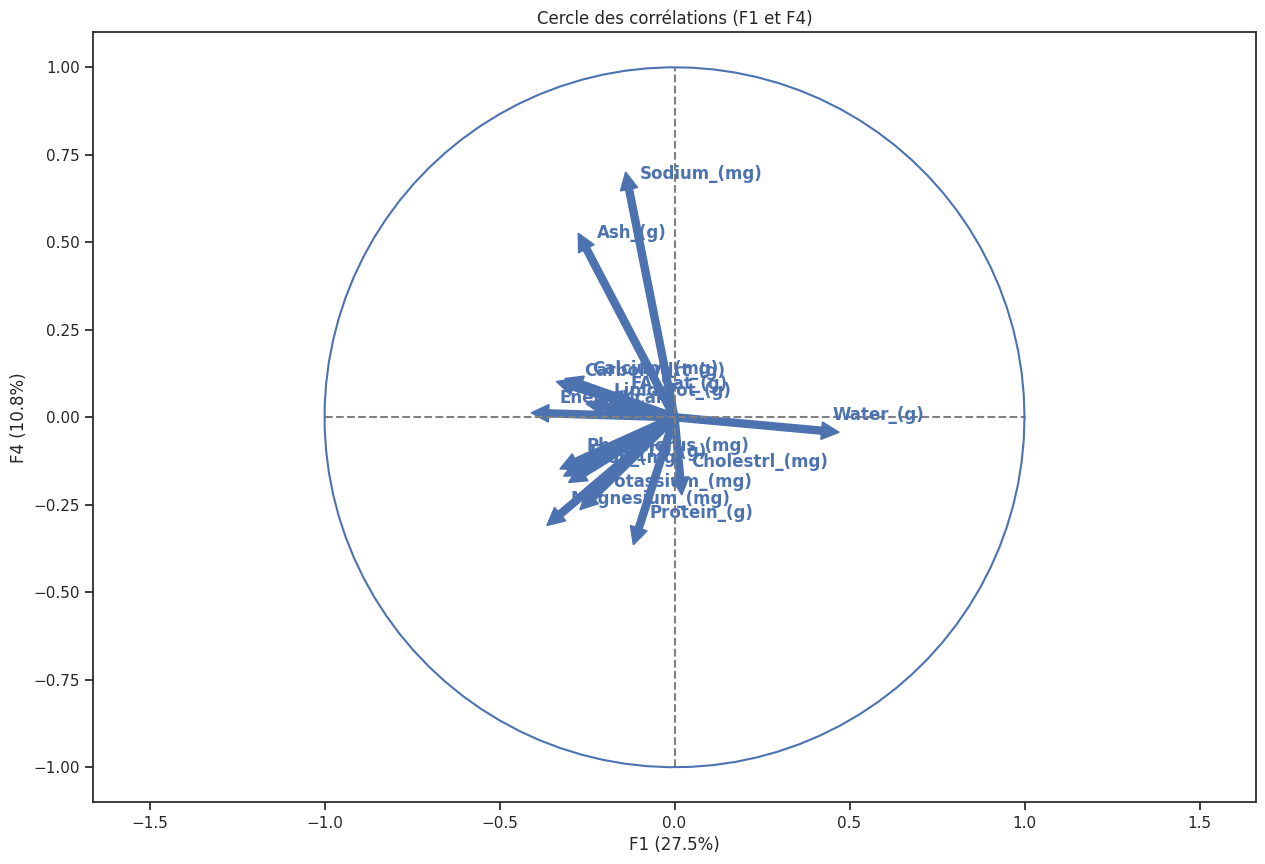

In [59]:
#Pour F1 et F4
x_y = (0,3)
x_y
correlation_graph(pca,x_y,vars_list)

Le cercle des correlations de l'ACP entre F1 et F4 confirme les observations de l'analyse bivariée.

- Les nutriments Sodium et matières minérales (Ash) se ressemblent
- Ces deux variables sont celles qui contribuent le plus à la formation de l'axe 4 : en effet on remarque que chaque fois que F4 est representée graphiquement, Sodium et Ash se remarquent bien.
- C'est aussi le cas pour water avec l'axe 1

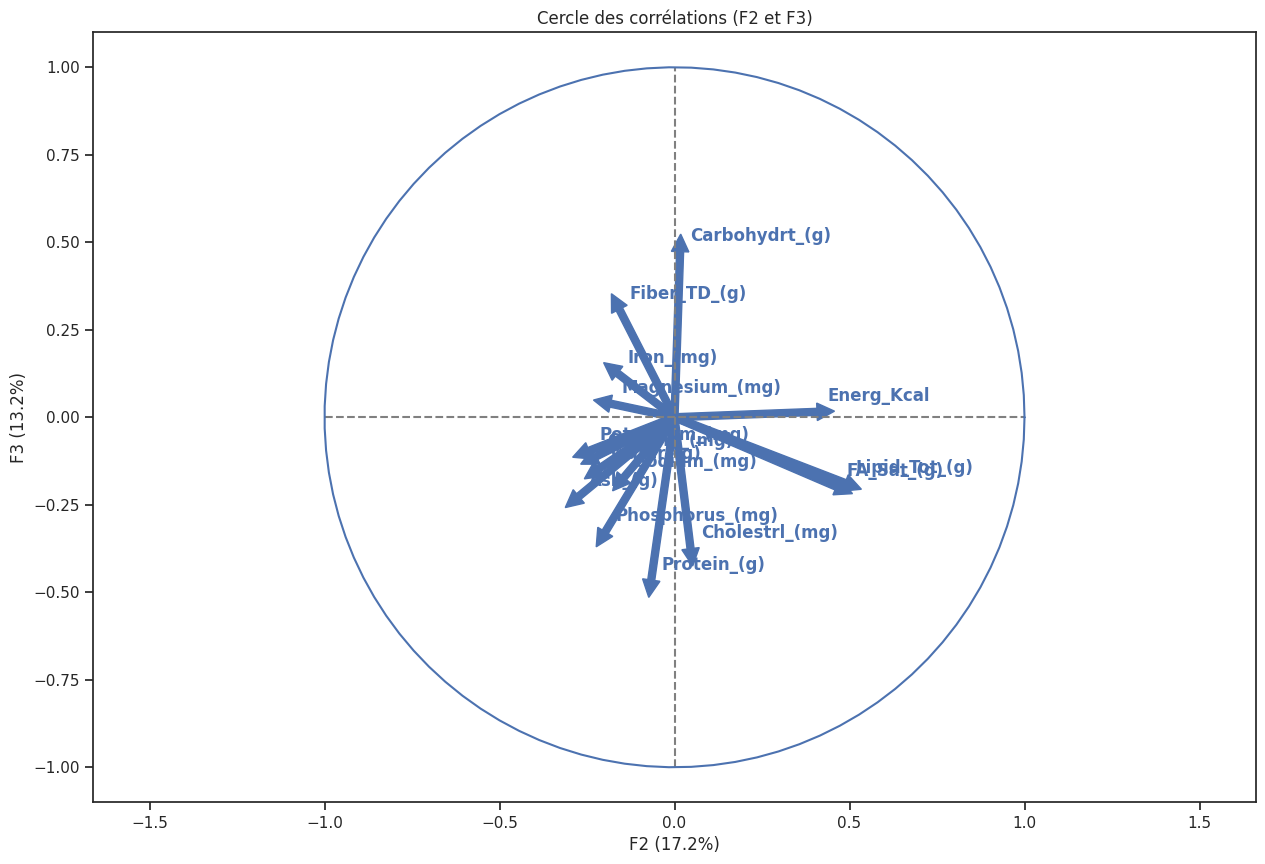

In [60]:
#Pour F2 et F3
x_y = (1,2)
x_y
correlation_graph(pca,x_y,vars_list)

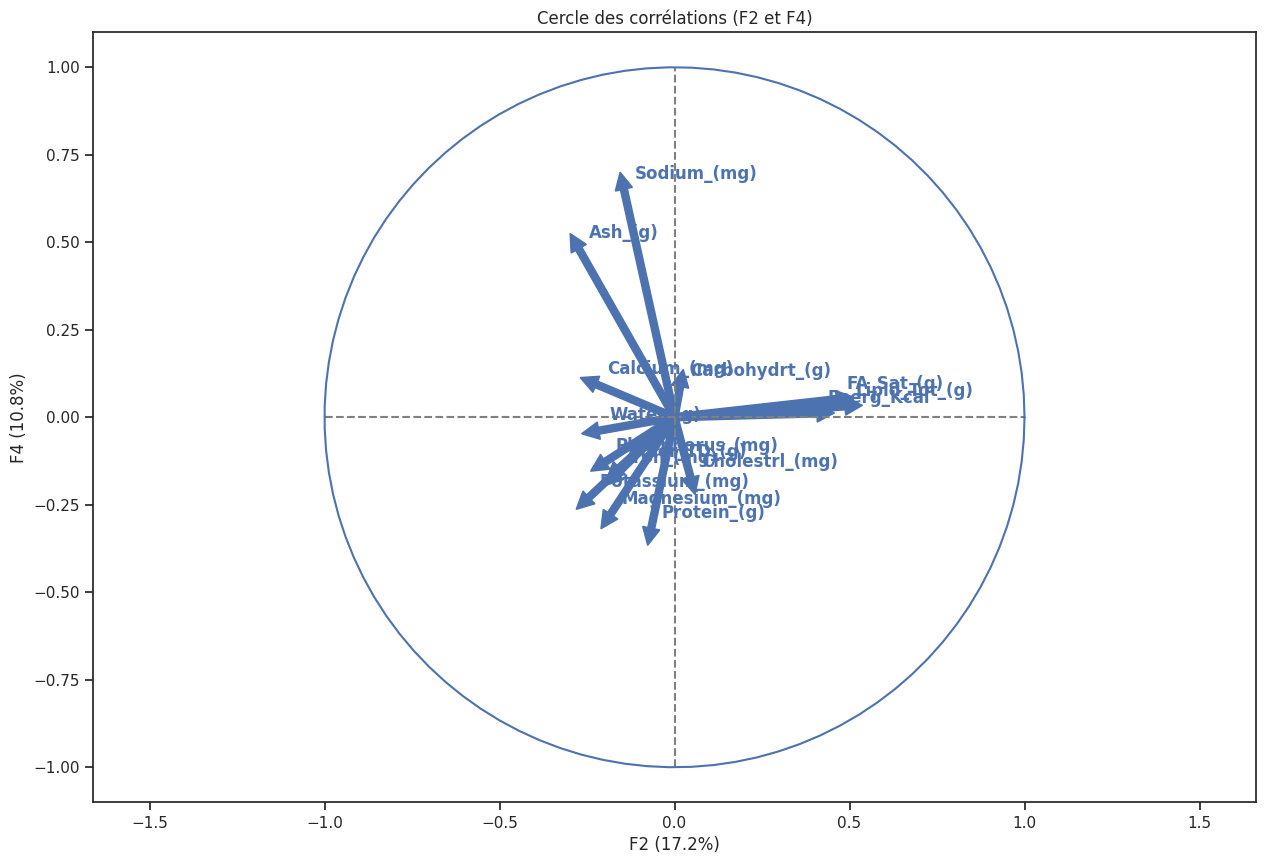

In [61]:
#Pour F2 et F4
x_y = (1,3)
x_y
correlation_graph(pca,x_y,vars_list)

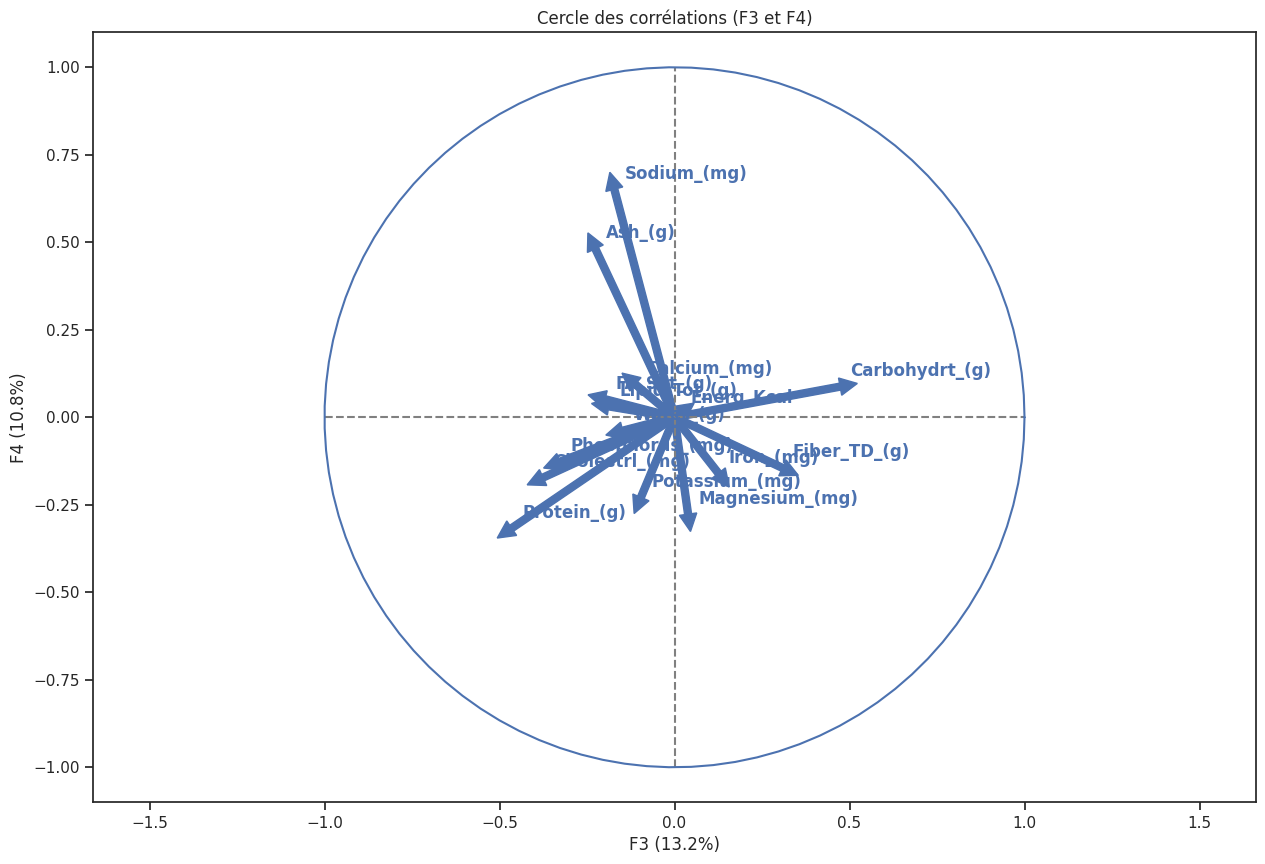

In [62]:
#Pour F3 et F4
x_y = (2,3)
x_y
correlation_graph(pca,x_y,vars_list)

- Les variables Carbohydrt et protéines sont celles qui contribuent le plus à la formation de l'axe 3 : en effet on remarque que chaque fois que F3 est representée graphiquement, Carbohydrt et protéines se remarquent bien.
- Meme constat pour FA_Sat et Lipide avec l'axe 2